<a href="https://colab.research.google.com/github/Shailendra114/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction(Machine_Learnng_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliances Energy Prediction


In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances . In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors.


#Problem Statement

 The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
 

#Attribute Information


* date time year-month-day hour:minute:second
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

#What we have to do ?

Now We have to predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset.


Before diving deep into the project,we have to undersand the roadmap which we will be following throughout the project.

#Roadmap:-
* Understanding the terms in the problem
* Loading the data into the dataframe
* Cleaning the data
* Extracting the statistics from the data
* EDA(Exploratory data analysis)
* Feature Selection
* Pre-processing data
* Model-Fit
* Conclusion


#Process Outline 



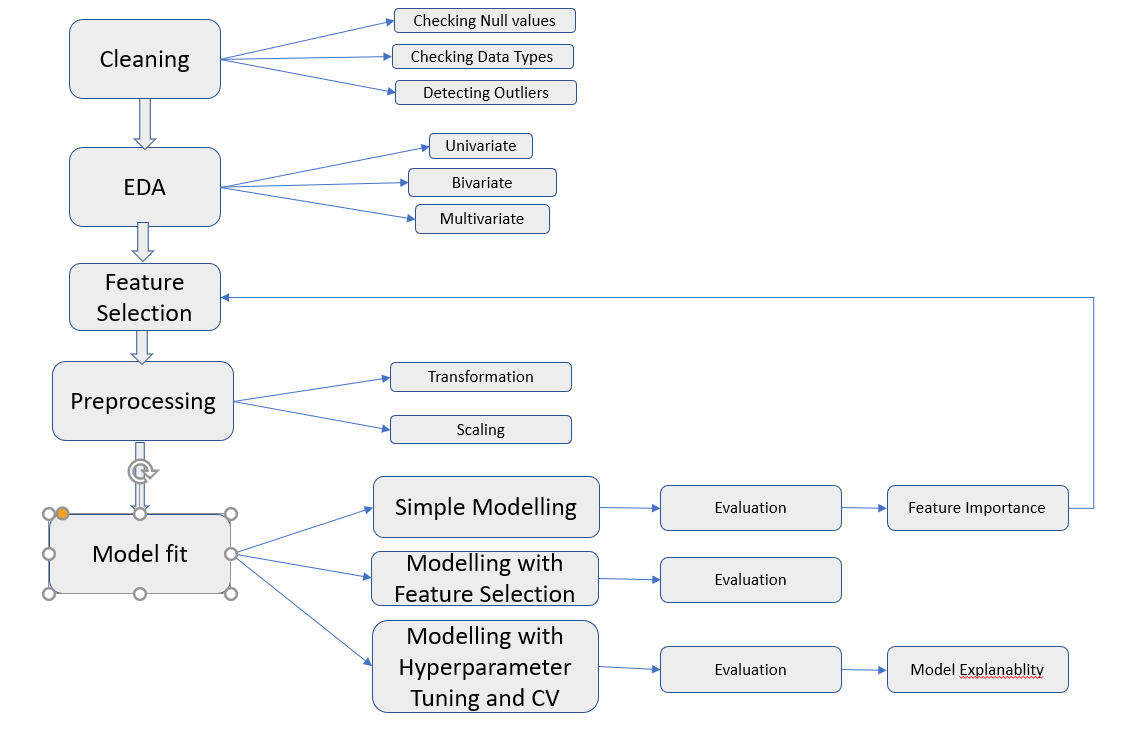

Lets start our project according to our roadmap and process---------

# 1.) Understanding the terms in the dataset


**1.)Relative Humidity:-**
  The amount of water vapour present in air expressed as a percentage of the amount needed for saturation at the same temperature is relative humidity.**For Example**-a relative humidity of 50 percent means the air is holding one half of the water vapor it can hold. Again, this is all dependent on the temperature.As shown the figure below-------


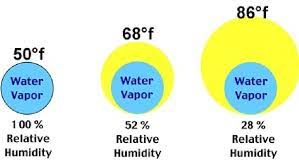

**2.)Visibility:-** Visibility is a measure of the distance at which an object or light can be clearly discerned. It depends only on the transparency of the surrounding air as in the figure below---

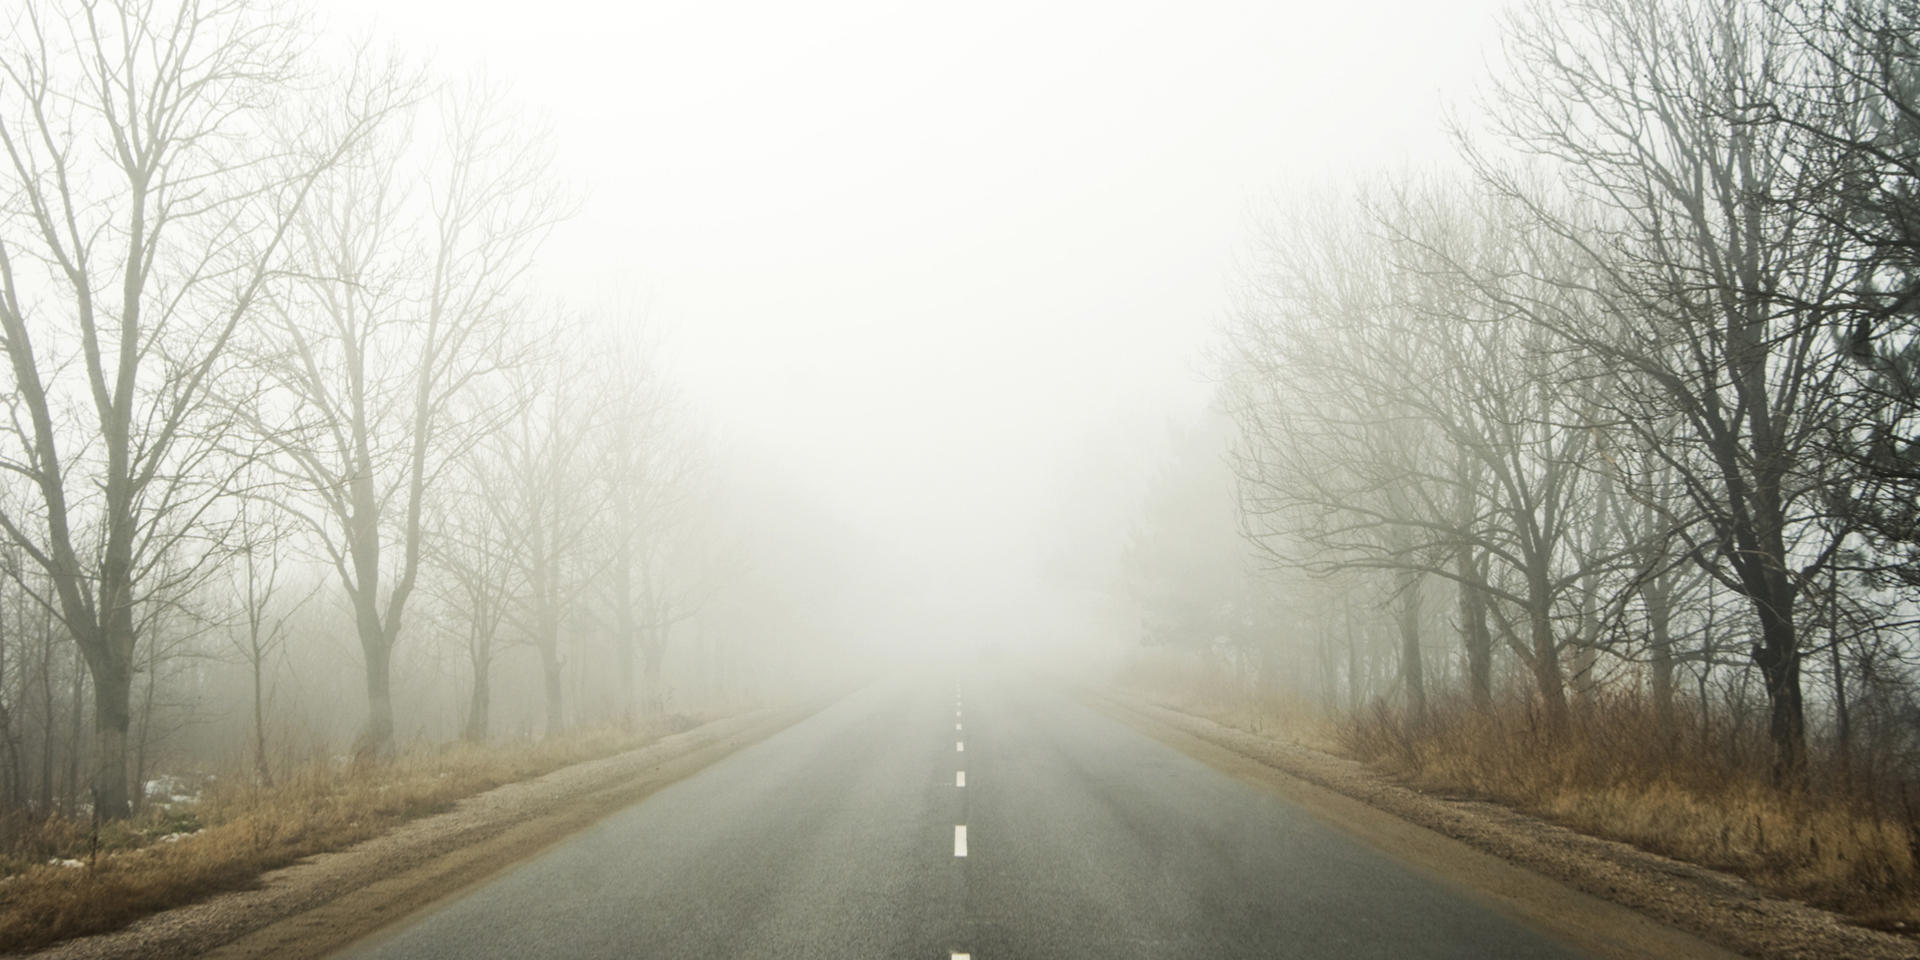

**3.)T-Dewpoint(Temperature of dewpoint)**:- The dew point is the temperature below which the water vapour in a volume of air at a constant pressure will condense into liquid water. It is the temperature at which the air is saturated with moisture.

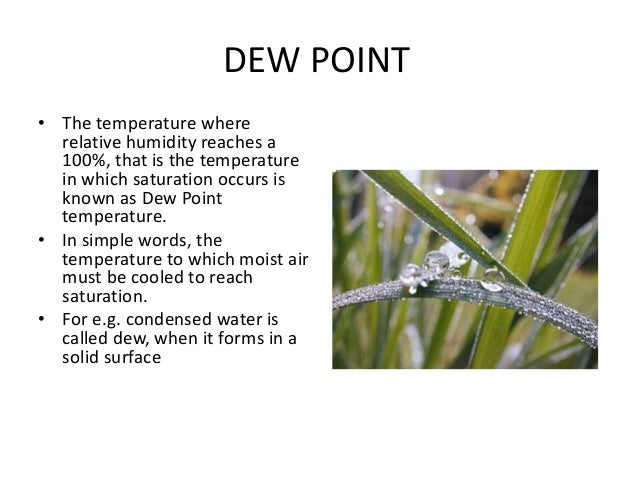

**4.)Windspeed:-** Wind speed is the speed of the weather related air movement from one place to the next.

Wind speeds usually mean the movement of air in an outside environment, but the speed of movement of air inside is also important in many cases, including weather forecasting, aircraft and maritime operations, construction and civil engineering.


High wind speeds yield more power because wind power is proportional to the cube of wind speed.

Approximately 2% of the solar energy striking the Earth’s surface is converted into kinetic energy in wind. Wind turbines convert the wind’s kinetic energy to electricity without emissions.1 The distribution of wind energy is heterogeneous, both across the surface of the Earth and vertically through the atmosphere. Average annual wind speeds of 6.5m/s or greater at 80m are generally considered commercially viable. New technologies, however, are expanding the wind resources available for commercial projects.3 In 2020, 8.4% of U.S. electricity was generated from wind energy, but wind capacity is increasing rapidly.

**5.)Air Pressure:-** Air pressure is the weight of air molecules pressing down on the Earth. The pressure of the air molecules changes as you move upward from sea level into the atmosphere. The highest pressure is at sea level where the density of the air molecules is the greatest.



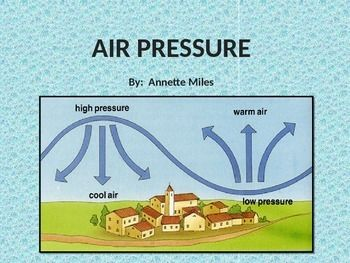

**So,We have understood the terms used in our dataset.Now we have to proceed with the second step i.e.,loading the data into the dataframe**

#2.) Loading the data into the dataframe

***Lets check basic structures of our data and see how beautifull does it look**

In [ ]:
#lets import important libraries which we will be using throughout the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno
import warnings
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential, layers, Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#lets mount our drive and upload the dataset
df= pd.read_csv('/content/drive/MyDrive/ Almabetter/ Capstone Project(Appliances Energy Prediction)/data_application_energy.csv')


Our drive is already mounted.So we just have to upload our data.
By the ay we can use 'drive.mount("/content/drive", force_remount=True)'to remount our drive.

In [ ]:
#lets check the type of our dastaset
type(df)  

pandas.core.frame.DataFrame

In [ ]:
#lets check how our data looks from top
df.head() 

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0  2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1  2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2  2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3  2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4  2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [ ]:
#lets check how our data looks from bottom
df.tail()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[5 rows x 29 columns]

In [ ]:
#lets check the shape of our data
df.shape


(19735, 29)

In [ ]:
#lets explore the statistics of our data
df.describe()


Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

In [ ]:
#lets check information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
#lets check uniqueness of our data
df.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

Our data is looking very beautifull.It has many features 
* Number of entries : 19735
* No of features : 27 ( 2 Random Variables included )
* Target Variable : Appliances
* All features are numerical. No categorical variables. 

Okay we are now ready to proceed for our second step i.e.,**Cleaning Data(X-Ray of Data)**

#2.) Cleaning Data

**1.) Lets check null values in Data**

In [ ]:
#lets check is there any null values or not
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

**Great** that there is no null values is our data.It has made our work very easier.Lets proceed and check is there outliers in our data or not------


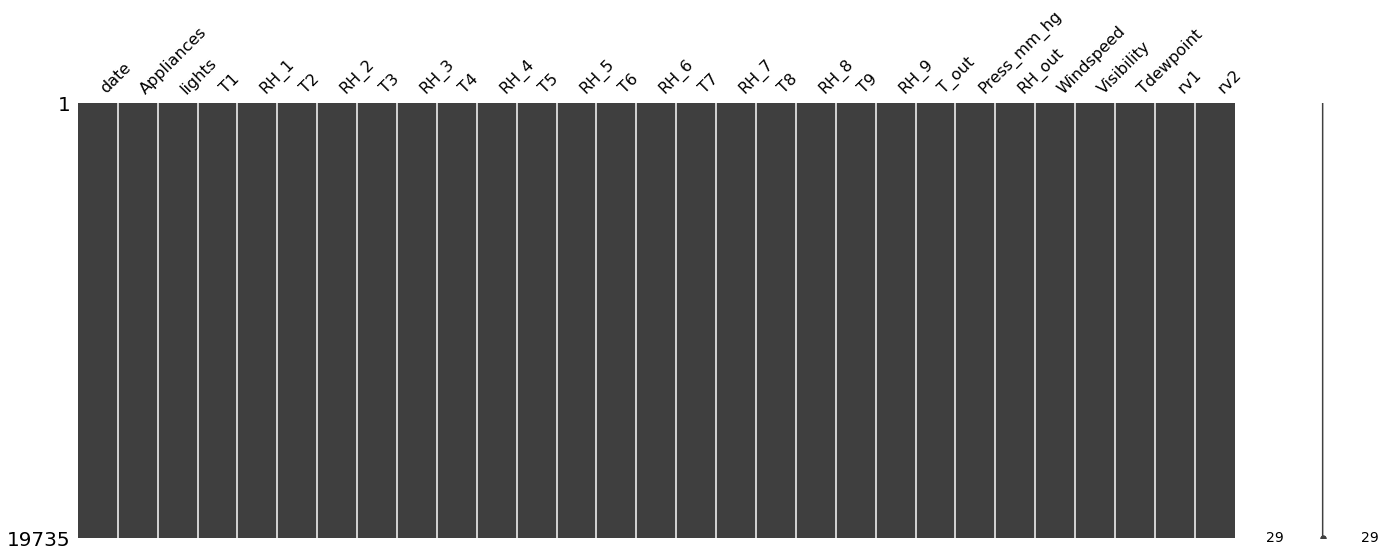

In [ ]:
#lets se  null values in the form of graph using missingno
pd.DataFrame(df.isna().sum(), columns=["records missing"]).T
mno.matrix(df, figsize = (23,8))

**2.) Lets check outliers in Data**

firstly we will check outliers in temperature---------------

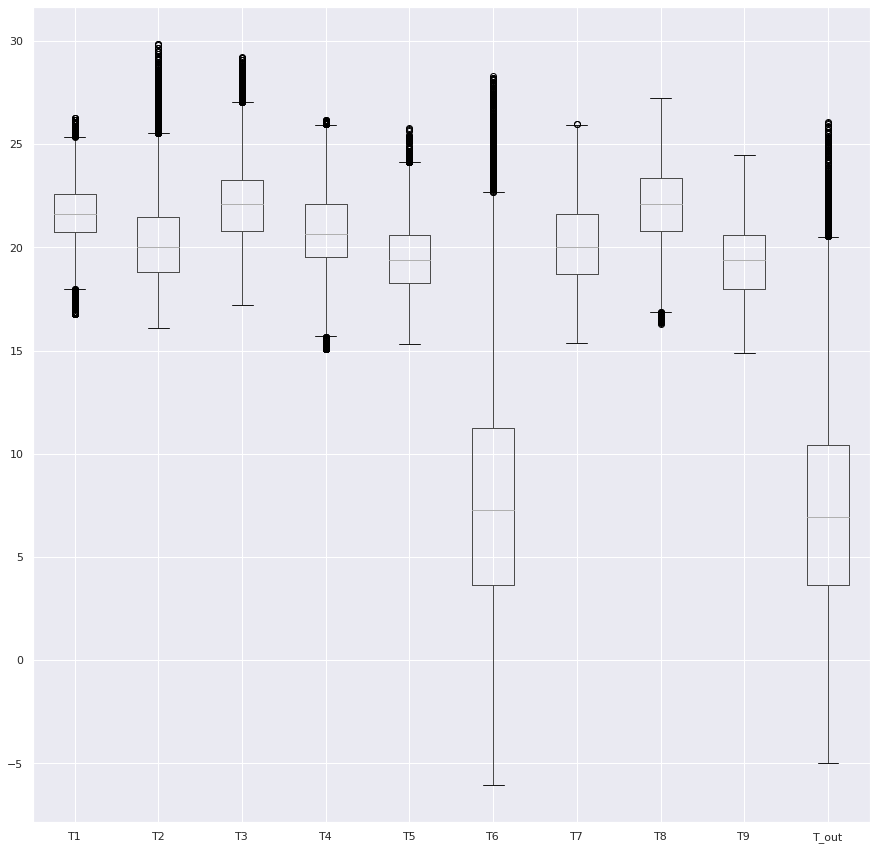

In [ ]:
df.boxplot(['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out'])


So its showing temperature distribution in our dataset and it shows that there is no outliers in our Temperature.Its very good for me because i do not have to remove any temperature from it.lets represent the same using some colourfull representation.Lets use seaborn library-----------------

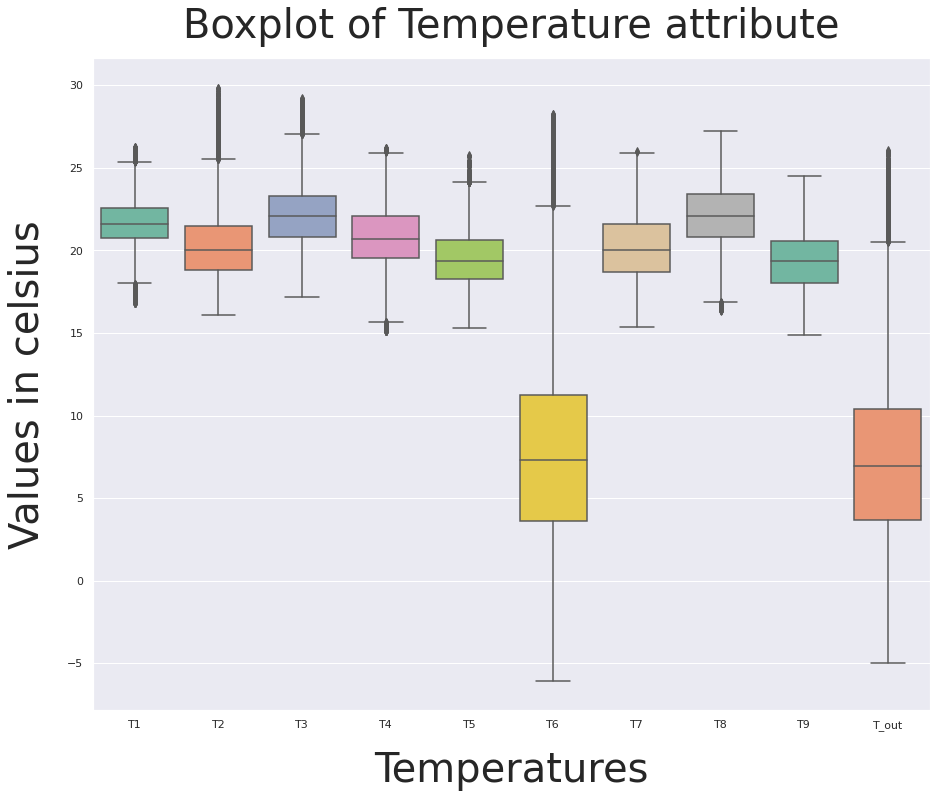

In [ ]:
#lets check oulier ussing seaborn library
ax = sns.boxplot(data = df[["T1", "T2","T3","T4","T5","T6","T7","T8","T9","T_out"]], orient = "v", palette = "Set2")
ax.set_xlabel("Temperatures", fontsize = 40, labelpad = 20)
ax.set_ylabel("Values in celsius", fontsize = 40, labelpad = 20)
ax.set_title("Boxplot of Temperature attribute", fontsize = 40,
            pad = 20)
sns.set(rc={'figure.figsize':(15,12)})

**Its looking very beautifull.Lets proceed for other features and check is there any outlier or not**

now we will check outliers in appliances---------

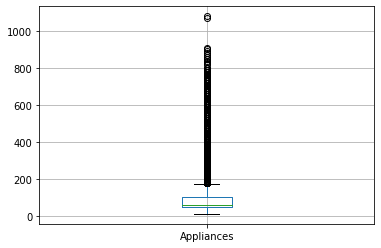

In [ ]:
#lets check outlier for appliance
df.boxplot('Appliances')
 

Text(0, 0.5, 'Values')

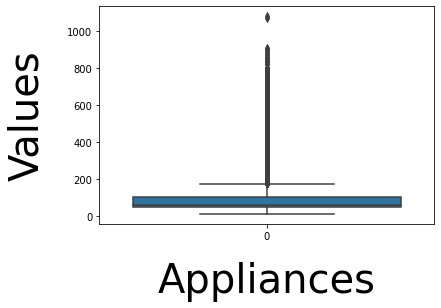

In [ ]:
#lets represent the above using seaborn library
ax= sns.boxplot(data= df['Appliances'])
ax.set_xlabel('Appliances',fontsize=40, labelpad=20)
ax.set_ylabel('Values',fontsize=40, labelpad=20)

so this is the distribution of appliances in our dataset.
Now we have to proceed for finding outliers in relative humdity.

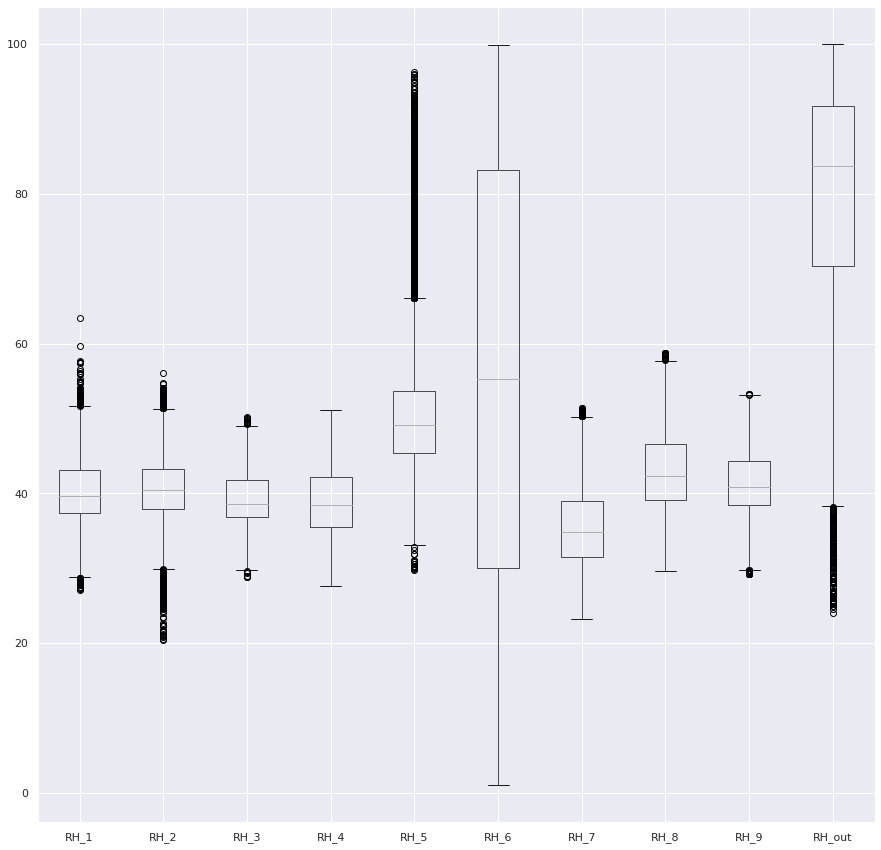

In [ ]:
#lets plot the boxplot of relative humidity
df.boxplot(['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out'])

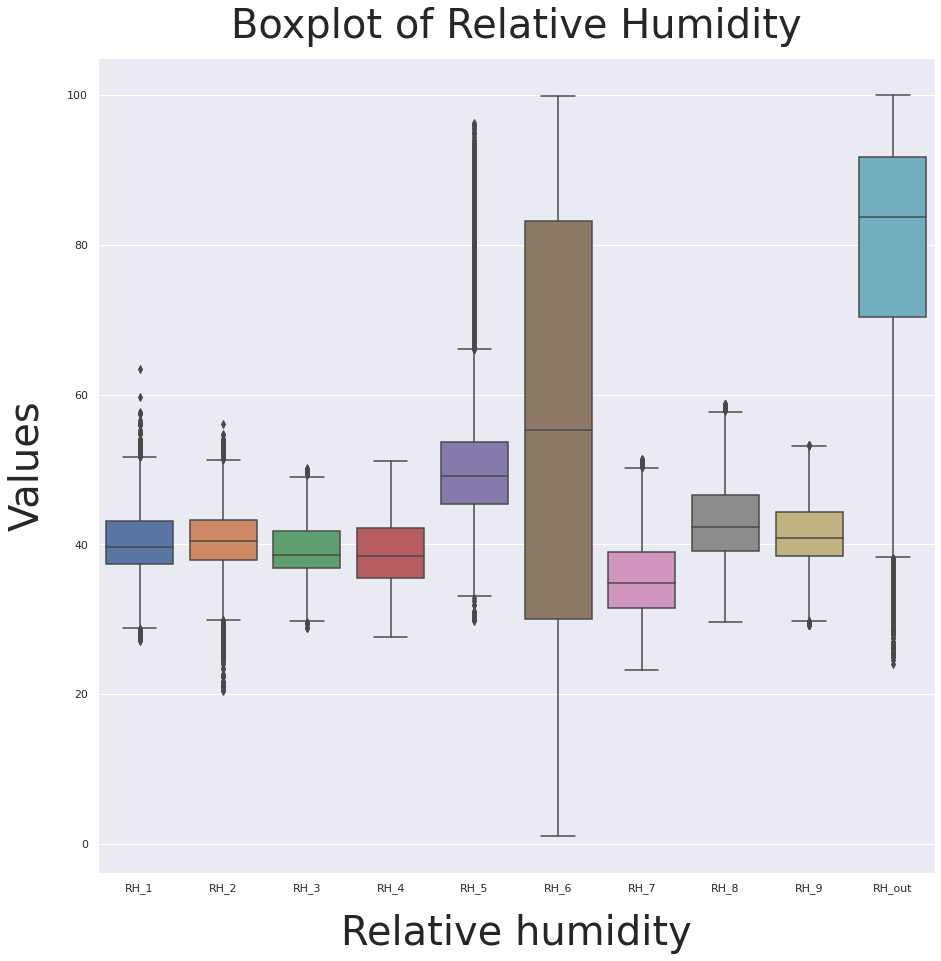

In [ ]:
#lets check outliers in relative humidity
ax= sns.boxplot(data= df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']],orient='v')
ax.set_xlabel('Relative humidity',fontsize=40, labelpad=20)
ax.set_ylabel('Values',fontsize=40, labelpad=20)
ax.set_title("Boxplot of Relative Humidity", fontsize = 40,
            pad = 20)
sns.set(rc={'figure.figsize':(15,15)})

Since date column is only used for understanding the consumption and most of the values of light column is also zero therefore lets drop these two columns.


In [ ]:
#lets drop light column
df= df.drop('lights', axis=1)

In [ ]:
#lets check shape of data now 
df.shape

(19735, 28)

**Key Observations :**

1. Light column was also removed as the are the reading of submeter and we are not focusing on appliance specific reading
2. Number of Independent variables at this stage — 26
3. Number of Dependent variable at this stage — 1
4. Total number of rows — 19735
6. The data set will be split 75–25 % between train & test.
7. Total # of rows in training set — 14801
8. Total # of rows in test set — 4934
9. All the features have numerical values. There are no categorical or ordinal features.
10.Number of missing values & null values = 0

So there is no outliers in our dataset that means our data is very cleaned and we are ready to proceed for EDA(EXploratory data analysis) part----

#3.) EDA(Exploratory Data Analysis)


**Why EDA(Exploratory Data Analysis):-**
* Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

* EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

we will be doing the Exploratory analysis of our data in the following way-----
* Descriptive Statistics Analysis
                                 * Descriptive  Statistics analysis of temperature.
                                 * Descriptive Statistics analysis of Relative humidity.
                                 * Descriptive Statistics  analysis of Weather.
                                 * Descriptive analysis of Aplliances.
* Data Visualization
               * Univariate Analysis
               * Bivariate Analysis
               * Multivariate Analysis


Lets first do Descriptive Statistics analysis of Temperature-------


Lets take out statistical analysis of it-----

In [ ]:
#lets describe it
df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T_out']].describe()


T1            T2  ...            T9         T_out
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      21.686571     20.341219  ...     19.485828      7.411665
std        1.606066      2.192974  ...      2.014712      5.317409
min       16.790000     16.100000  ...     14.890000     -5.000000
25%       20.760000     18.790000  ...     18.000000      3.666667
50%       21.600000     20.000000  ...     19.390000      6.916667
75%       22.600000     21.500000  ...     20.600000     10.408333
max       26.260000     29.856667  ...     24.500000     26.100000

[8 rows x 10 columns]

Lets do Descriptive analysis of Relative humidity.------

Lets take out statistical analysis of it-----

In [ ]:
# Lets describe it
df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].describe()


RH_1          RH_2  ...          RH_9        RH_out
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      40.259739     40.420420  ...     41.552401     79.750418
std        3.979299      4.069813  ...      4.151497     14.901088
min       27.023333     20.463333  ...     29.166667     24.000000
25%       37.333333     37.900000  ...     38.500000     70.333333
50%       39.656667     40.500000  ...     40.900000     83.666667
75%       43.066667     43.260000  ...     44.338095     91.666667
max       63.360000     56.026667  ...     53.326667    100.000000

[8 rows x 10 columns]

Lets do Statistical analysis of Applianes---

In [ ]:
# lets describe it
df[['Appliances']].describe()


Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

Lets do Statistical analysis of Pressure,Tdewpoint,Windspeed,Visibility-----

In [ ]:
df[['Press_mm_hg','Tdewpoint','Windspeed','Visibility']].describe()

Press_mm_hg     Tdewpoint     Windspeed    Visibility
count  19735.000000  19735.000000  19735.000000  19735.000000
mean     755.522602      3.760707      4.039752     38.330834
std        7.399441      4.194648      2.451221     11.794719
min      729.300000     -6.600000      0.000000      1.000000
25%      750.933333      0.900000      2.000000     29.000000
50%      756.100000      3.433333      3.666667     40.000000
75%      760.933333      6.566667      5.500000     40.000000
max      772.300000     15.500000     14.000000     66.000000

**Feature Ranges**
1. Temperature : -6 to 30 deg
2. Humidity : 1 to 100 %
3. Windspeed : 0 to 14 m/s
4. Visibility : 1 to 66 km
5. Pressure : 729 to 772 mm Hg
6. Appliance Energy Usage : 10 to 1080 Wh

**Observations:-**
* Outside the building average temp > average humidity inside the house.

* Average humidity at the weather station > outside humidity near the building.

* Average humidity in the bathroom > other rooms due to obvious reasons.

* Kids and parent room show a comparatively higher average humidity.

Now lets proceed for data visualization part.For that we will start from univariate analysis-----------

# A.) Univariate Analysis

For univariate Analysis of the dataset lets break it into three parts-----

In [ ]:
#lets break into three parts
temp_col=['T1','T2','T3','T4','T5','T6','T7','T8','T9']
hum_col=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']
other_col=['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2']

 We have divided our df in three varibales type, temperature Humidity and Other, so that we can do a better analysis---------

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

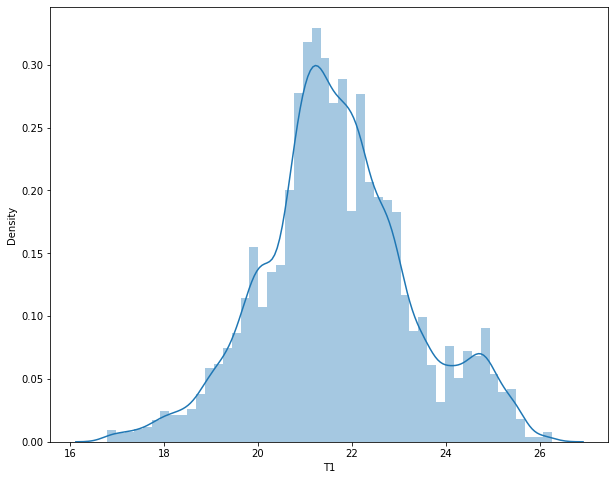

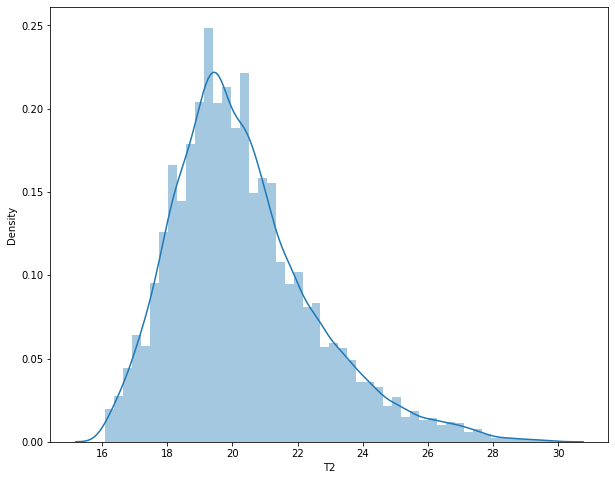

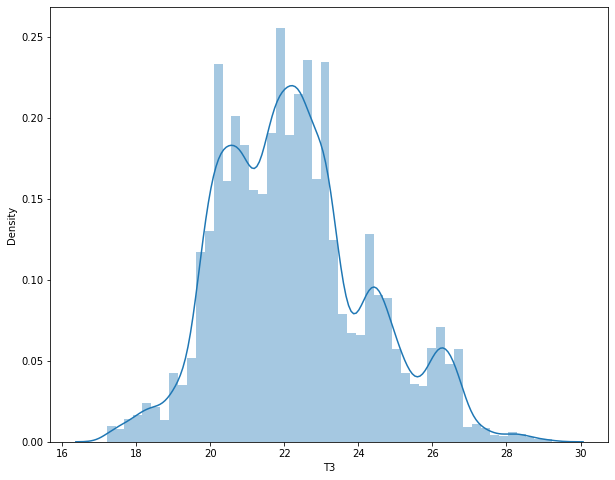

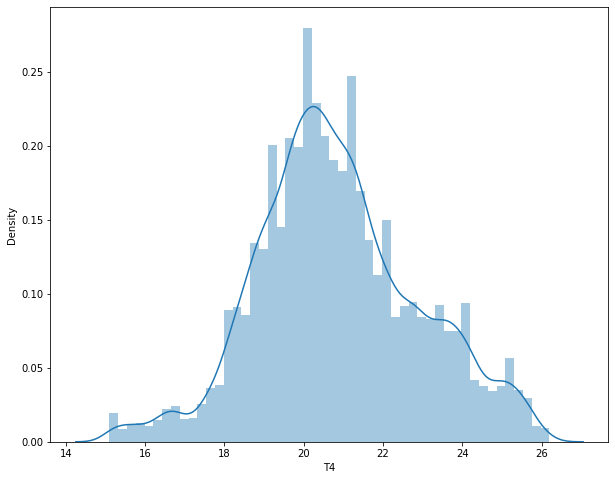

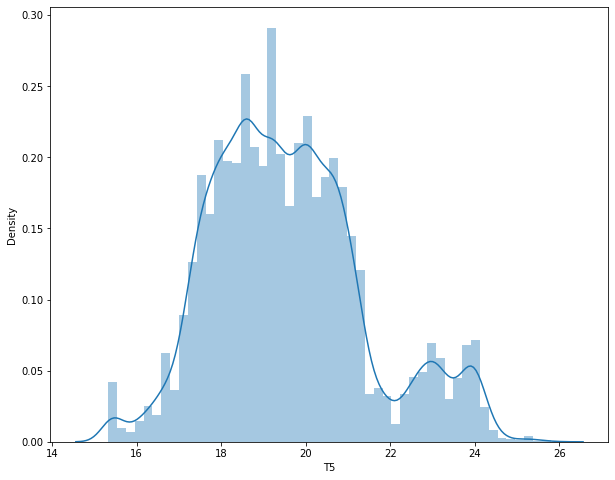

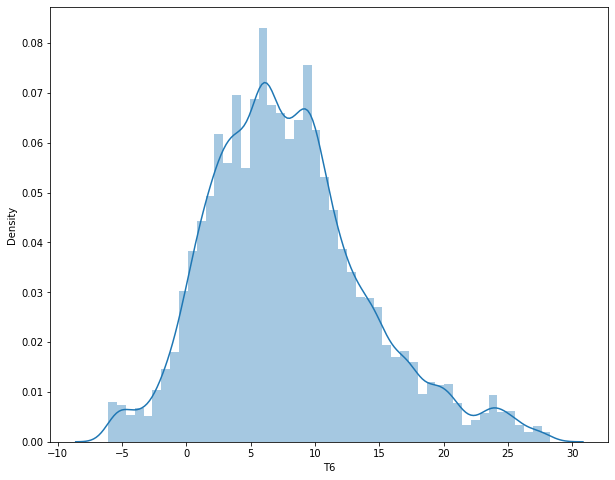

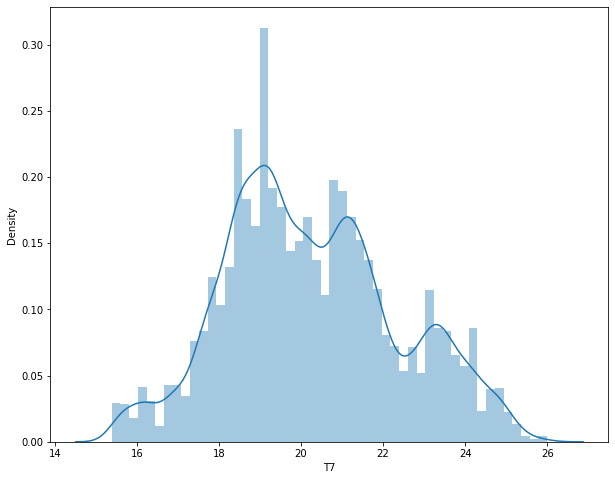

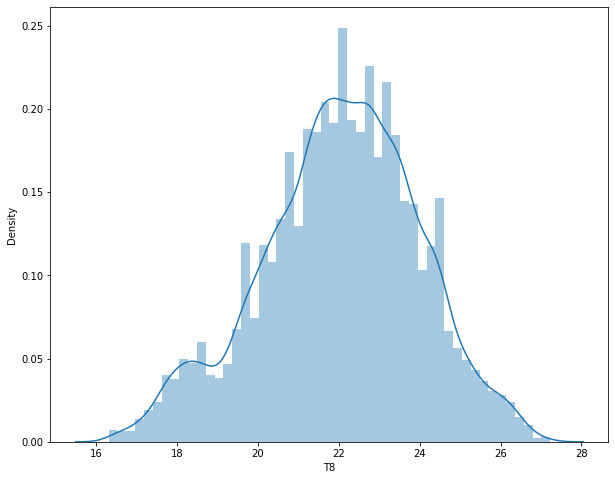

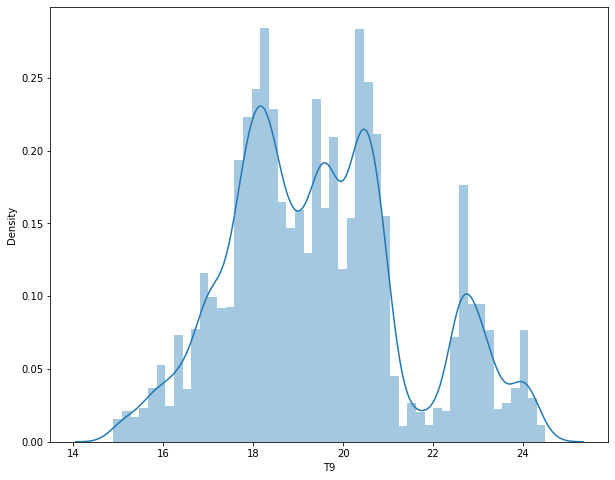

In [ ]:
#first lets study temperature
for i in temp_col:
  plt.figure(figsize=(10,8))
  sns.distplot(df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

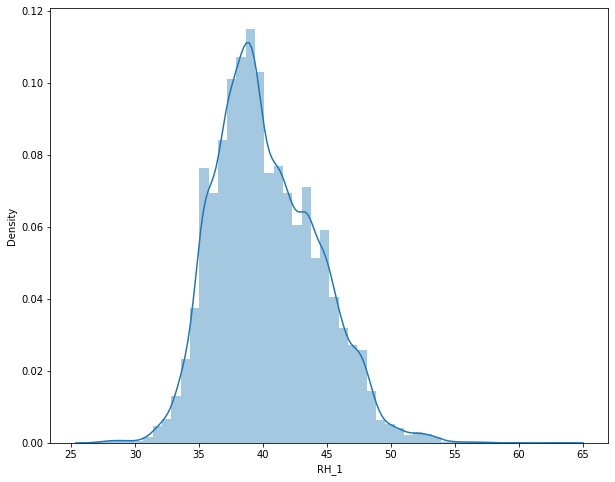

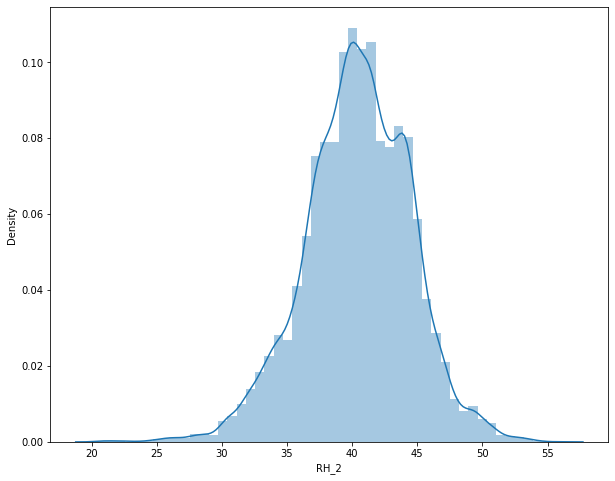

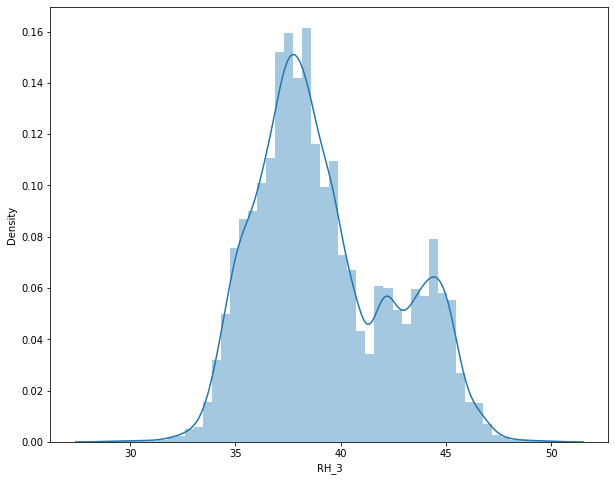

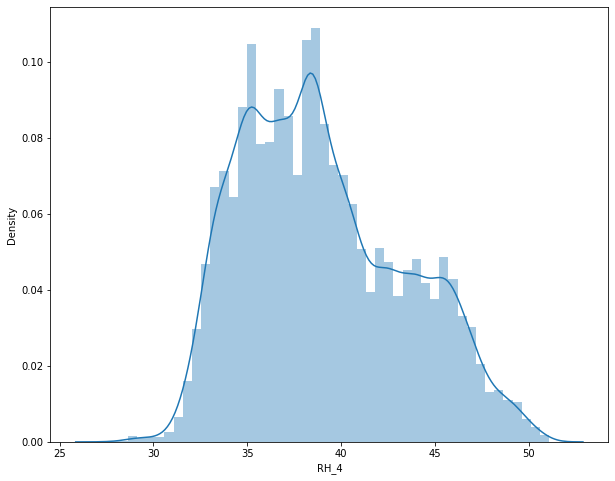

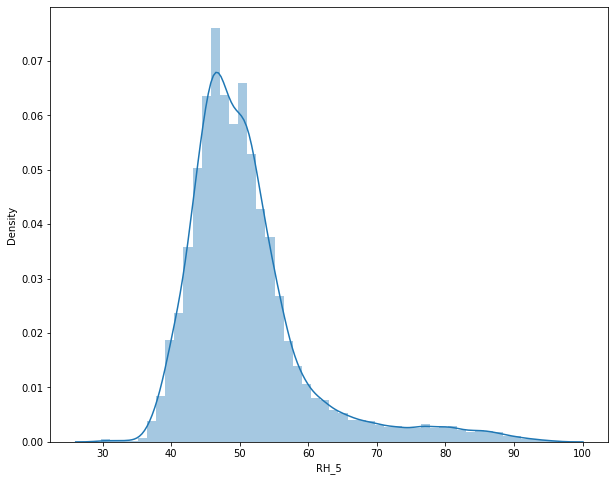

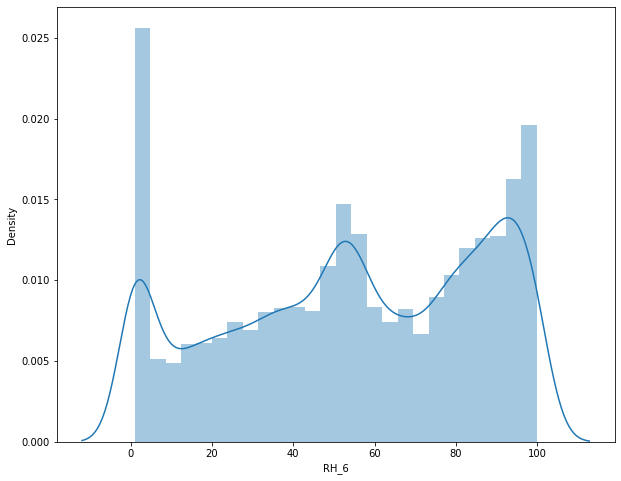

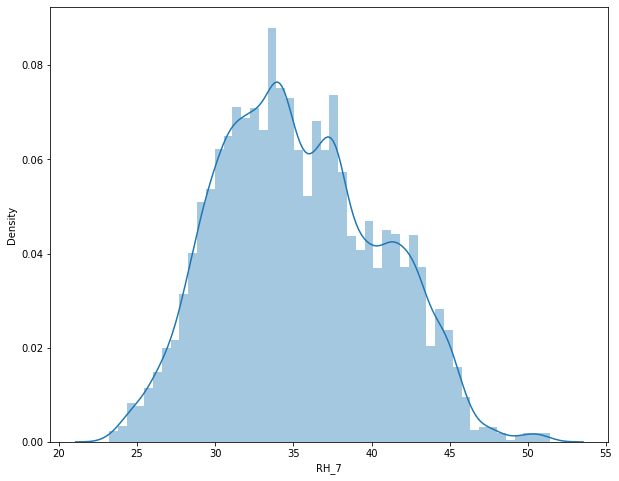

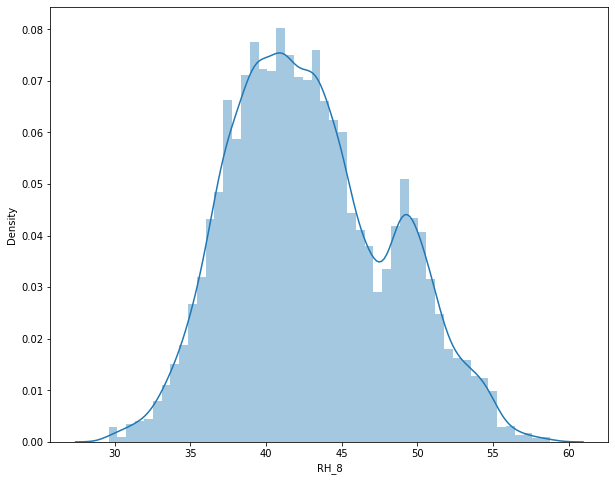

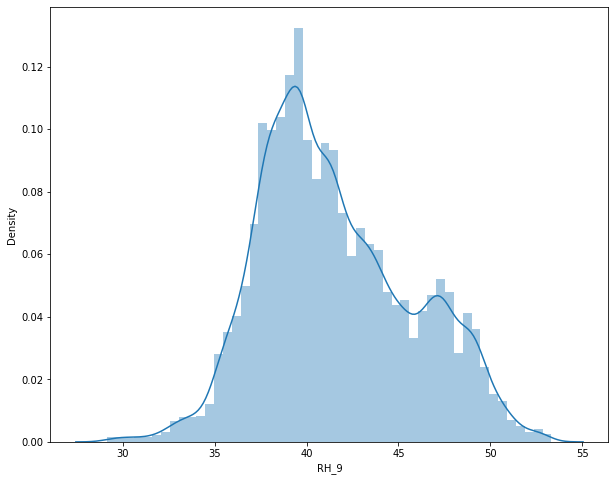

In [ ]:
#Now lets study Humidity
for i in hum_col:
  plt.figure(figsize=(10,8))
  sns.distplot(df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

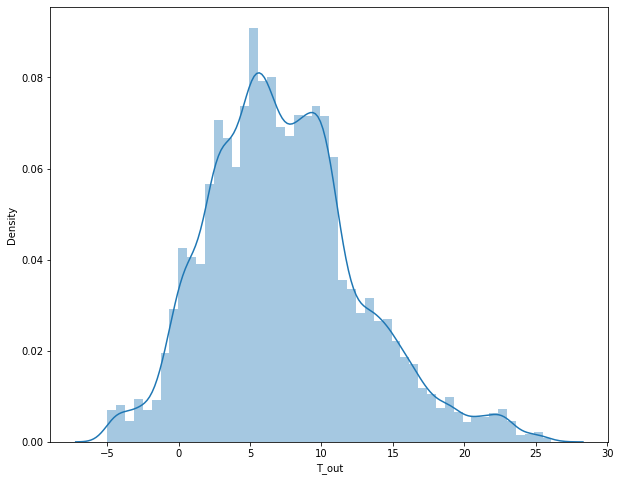

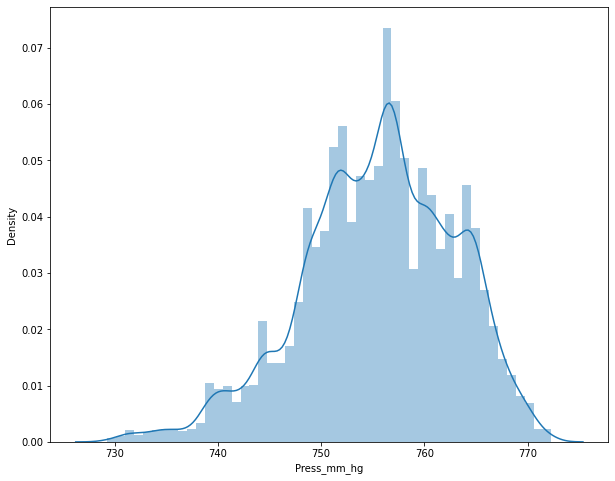

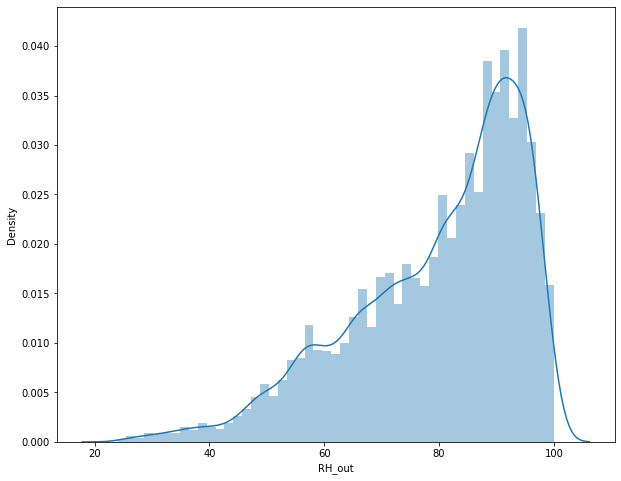

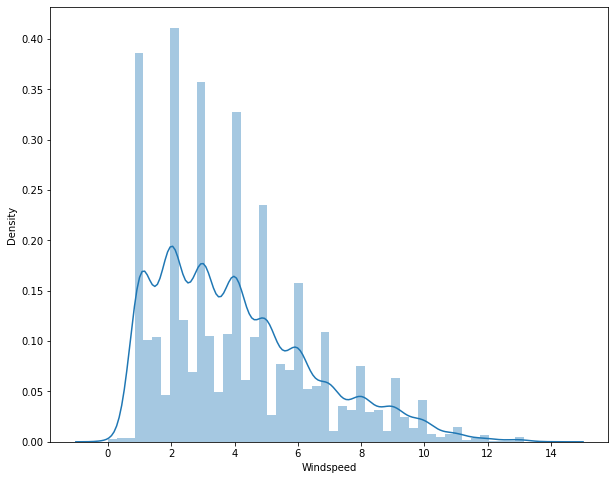

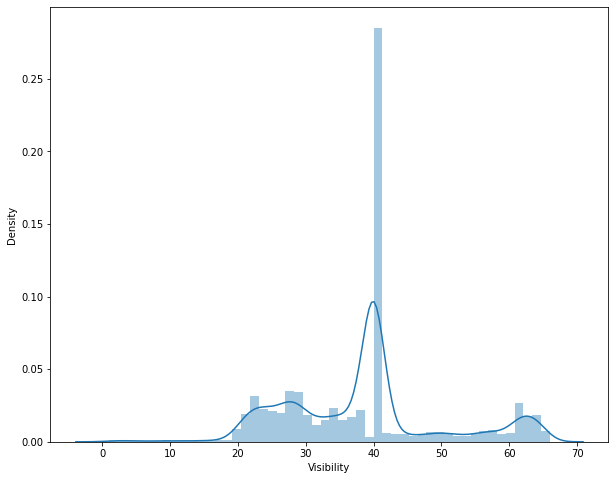

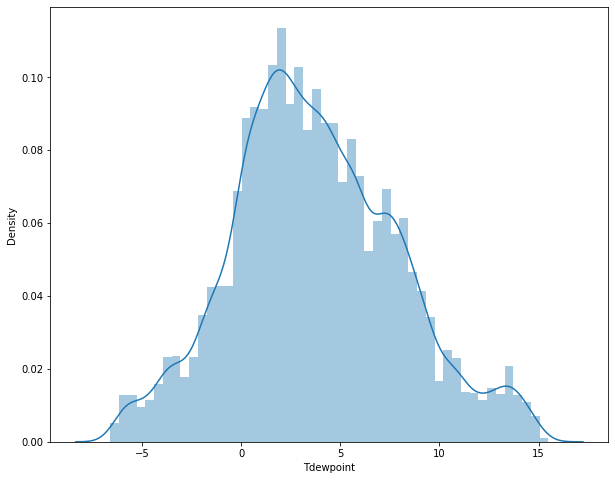

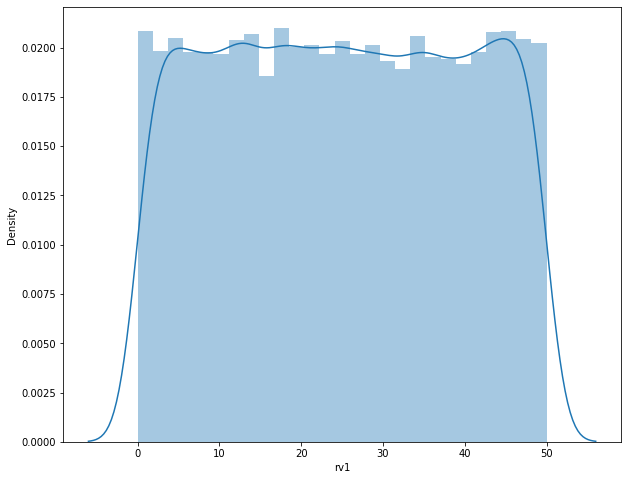

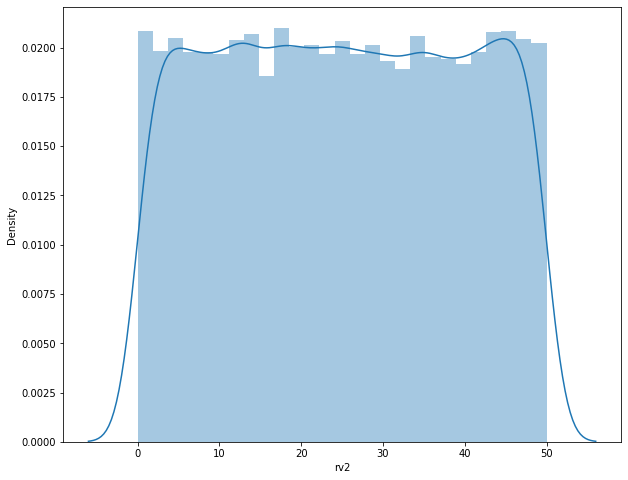

In [ ]:
#now lets study other Variables
for i in other_col:
  plt.figure(figsize=(10,8))
  sns.distplot(df[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


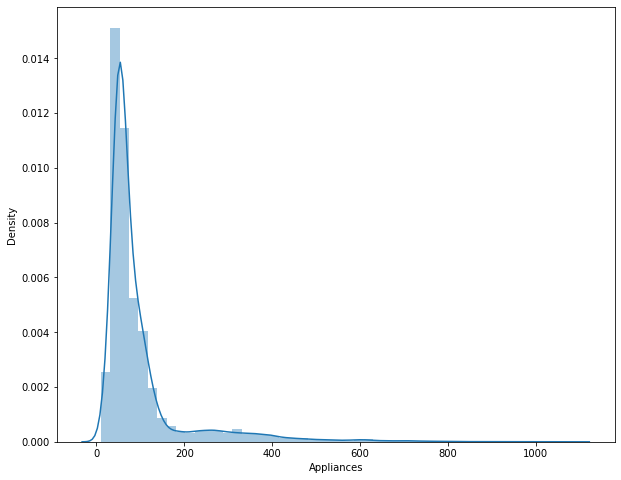

In [ ]:
 #Now lets study target variable distribution
 plt.figure(figsize=(10,8))
 sns.distplot(df['Appliances'])

**Key Observations:-**

* All humidity values except RH_6 and RH_out follow a Normal distribution, i.e.all the readings from sensors inside the home are from a Normal distribution.
* Similarly, all temperature readings follow a Normal distribution except for T9.
* Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
* The random variables rv1 and rv2 have more or less the same values for all the recordings.
* The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.
* No column has a distribution like the target variable Appliances. Hence, there are no feature independent feature with a linear relationship with the target.

Lets plot histogram of each features

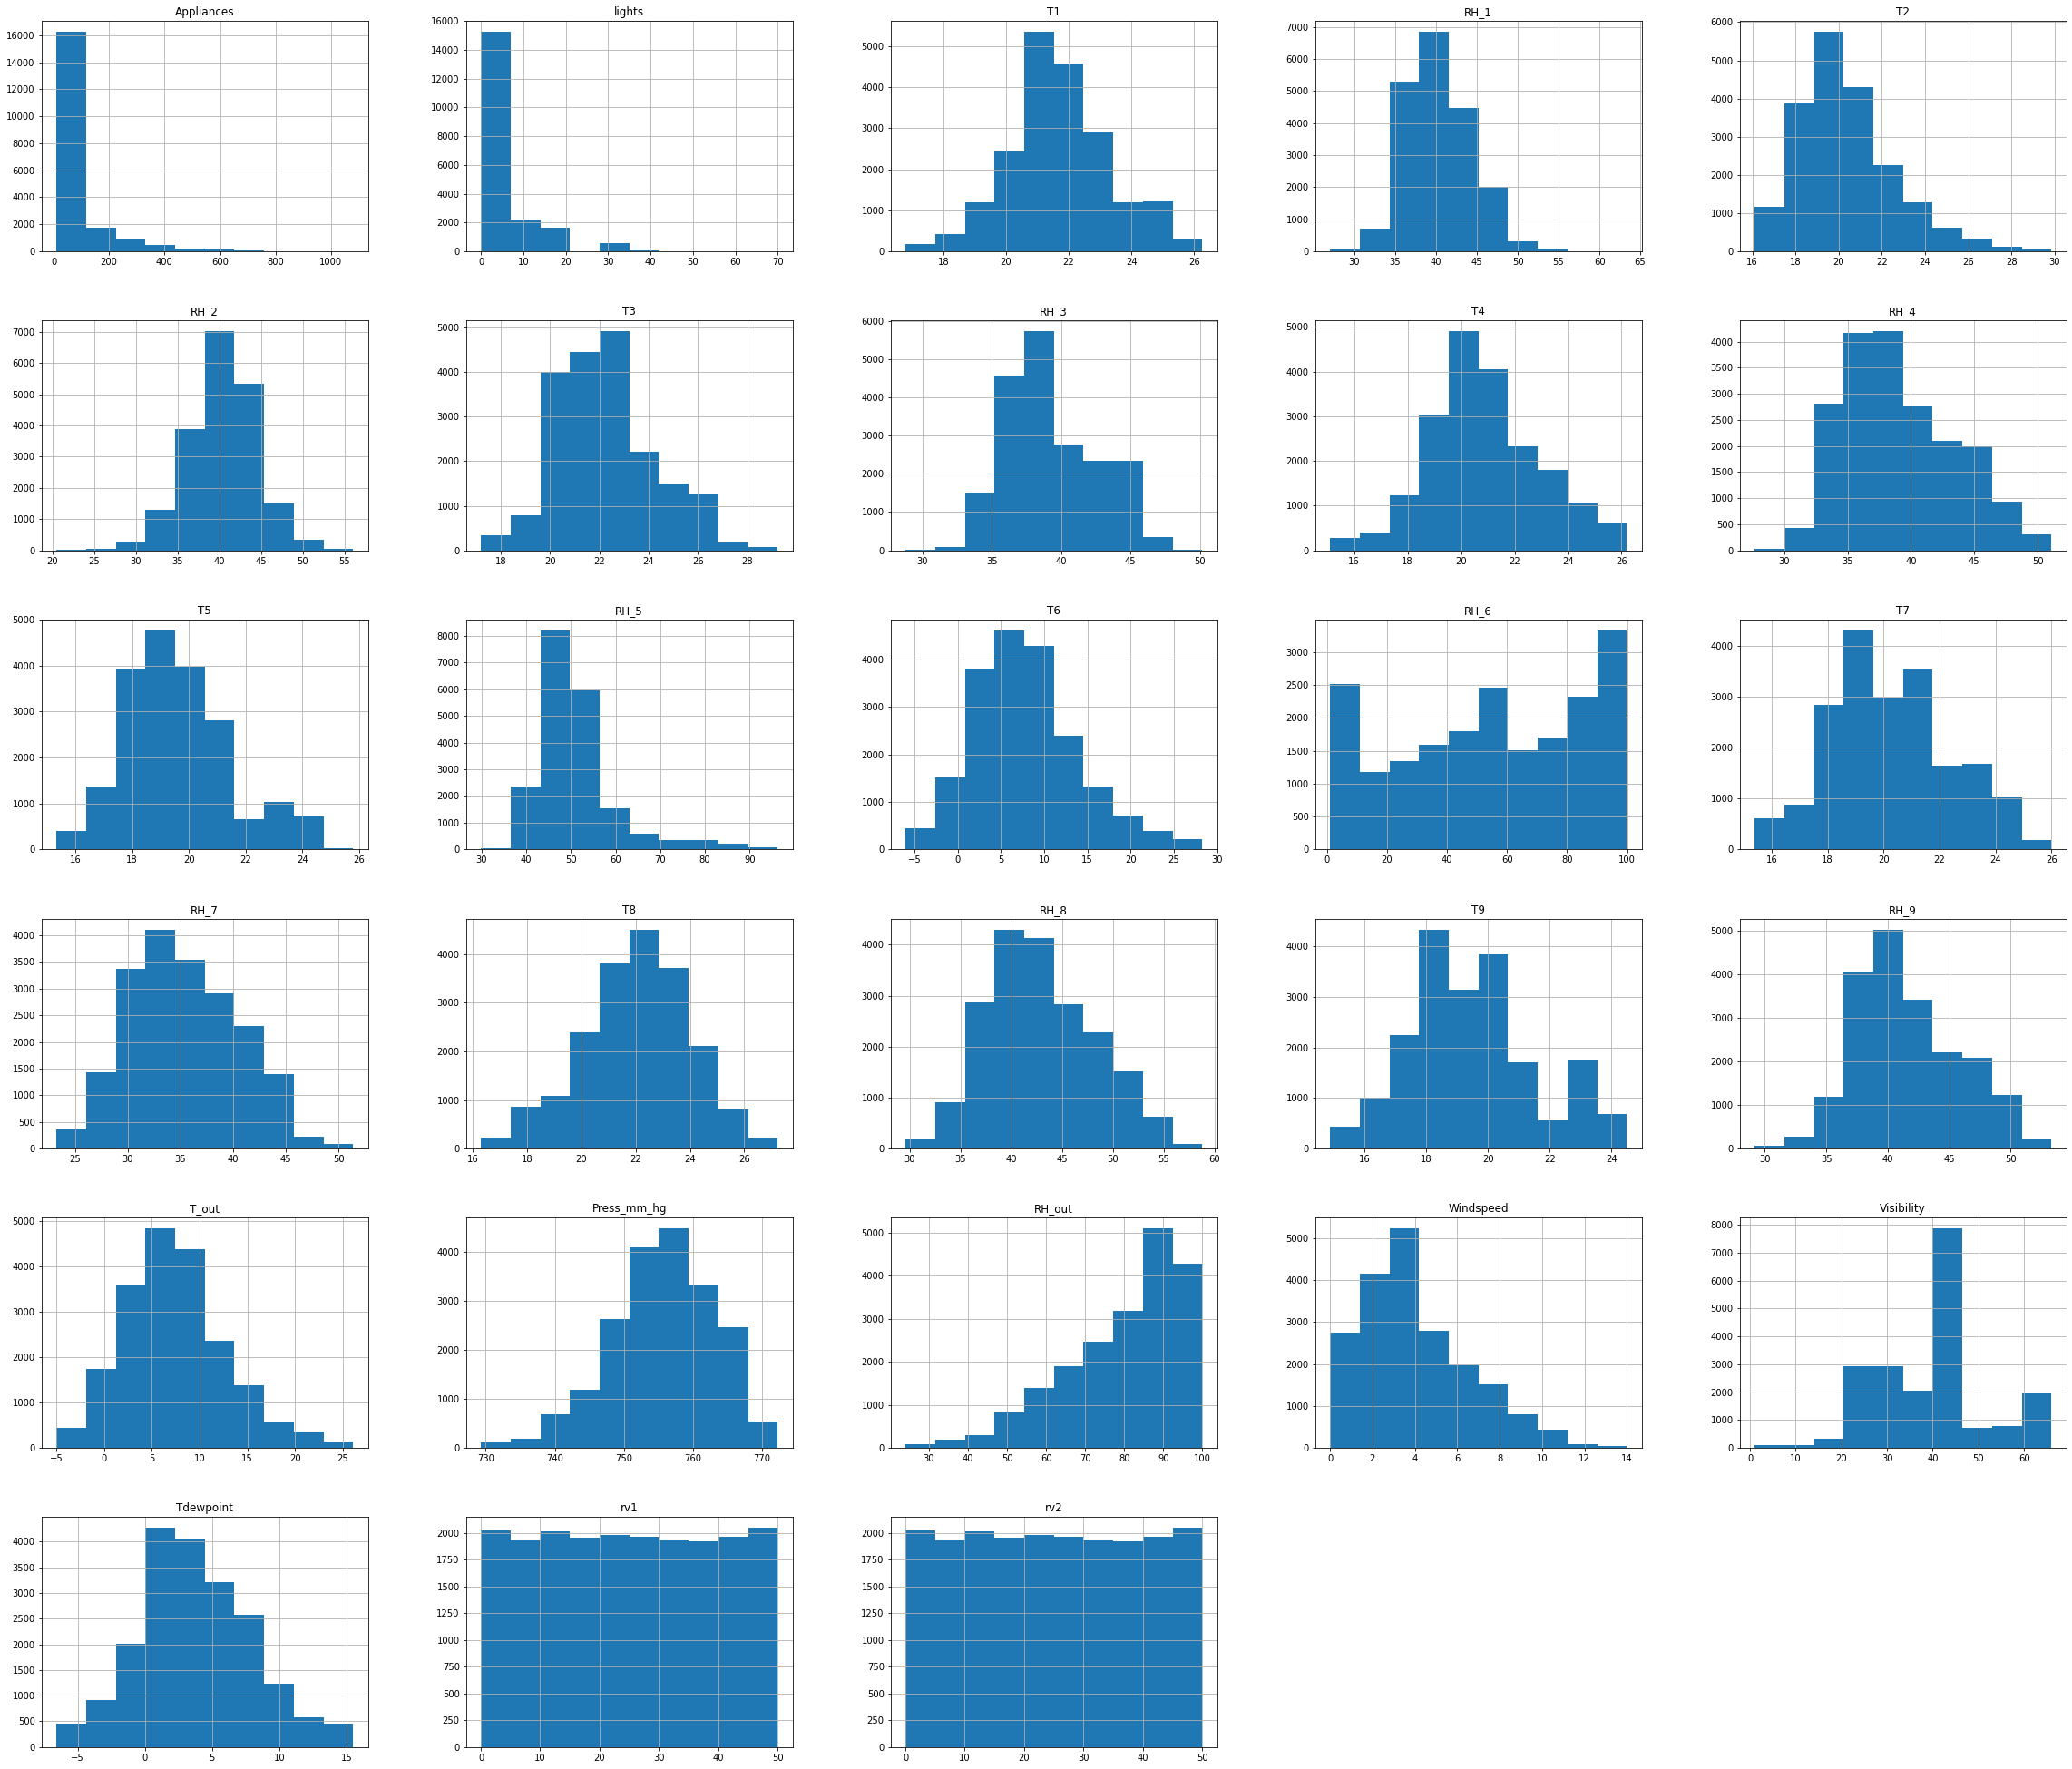

In [ ]:
p = df.hist(figsize = (40,35))

**Lets see average energy consumption.Wee will see this in the following pattern------**
* Per Hour
* Per weekand
* Per month


for that lets Create average energy consumption over hour,day,weekand and month--------

In [ ]:
# lets create average energy consumption over hour,day,weekand,and month
df['weekday'] = ((pd.to_datetime(df['date']).dt.dayofweek)// 5 == 0).astype(int)
df['hour'] = pd.to_datetime(df['date']).dt.hour
df['month'] = pd.to_datetime(df['date']).dt.month

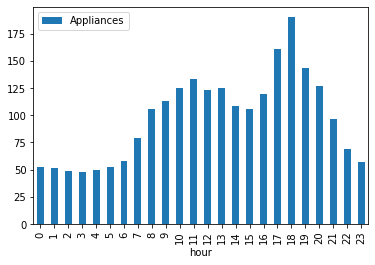

In [ ]:
df.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 6 PM is comparatively higher and sharper.

We observe that over the sleeping hours (10 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

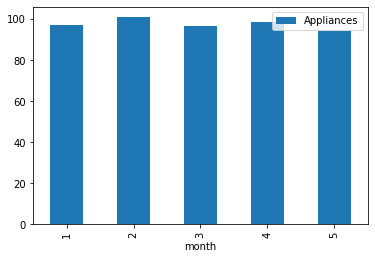

In [ ]:
df.groupby('month').agg({'Appliances' : 'mean'}).plot.bar()

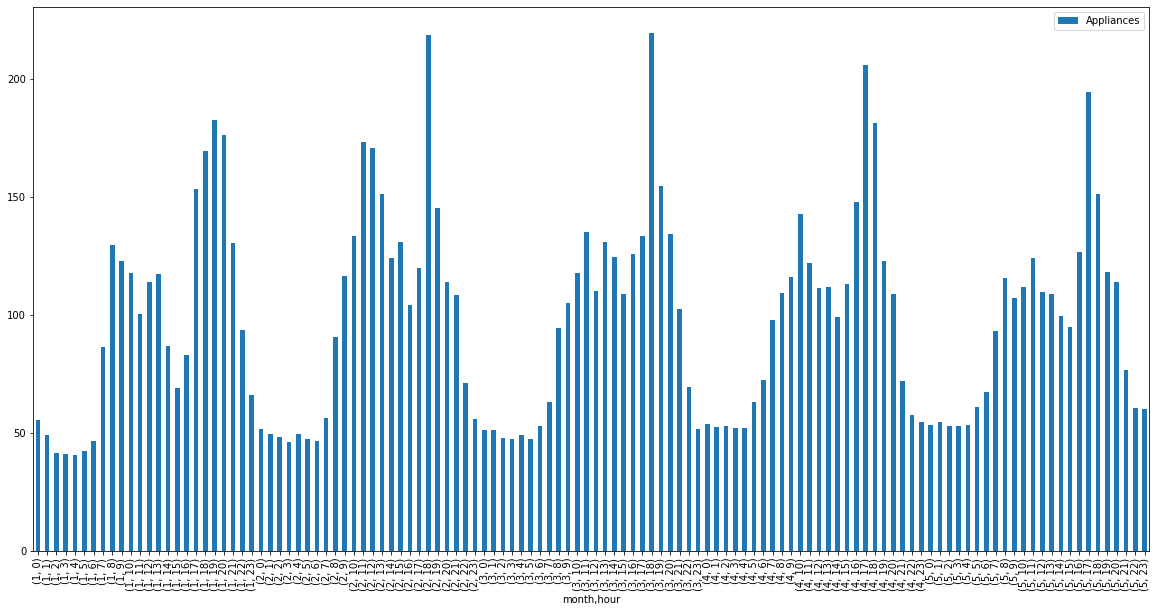

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
df.groupby(['month','hour']).agg({'Appliances' : 'mean'}).plot.bar(ax=ax)

A trend of high consumption hours for each month seems to be similar to the over all trend



**What about weekdays and weekends?**

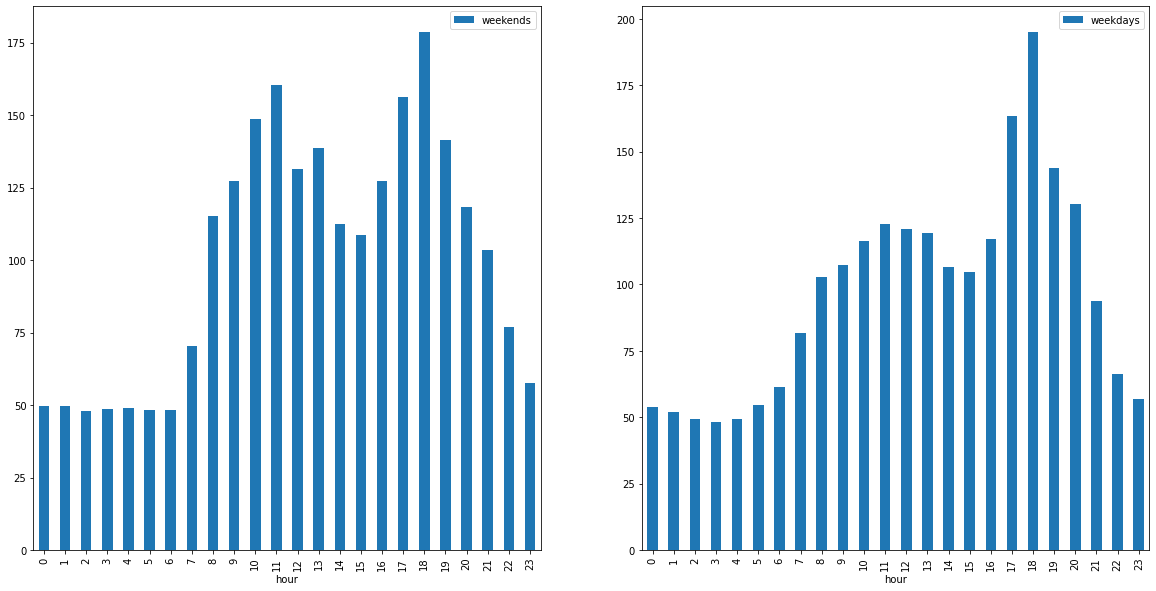

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
week_df = df.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

We observe that the energy consumption of appliances during the office hours (8 AM - 4 PM) is higher in weekends compared to the weekdays. Also, average overall consumption is higher in weekends is pretty high.

**Lets use catplot to see total distribution of all features**

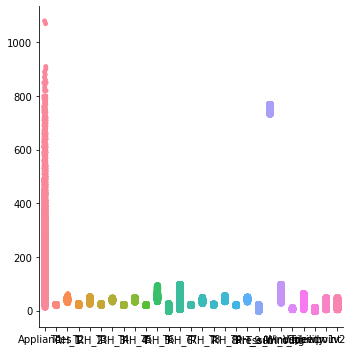

In [ ]:
sns.catplot(data=df)
 

# B.) Bivariate Analysis


In [ ]:
import datetime 
def hour_fet(x):
   return pd.to_datetime(x).hour

def weekday_fet(x):
   return pd.to_datetime(x).weekday()
   
df['hour']=df['date'].apply(hour_fet)
df['weekday']=df['date'].apply(weekday_fet)

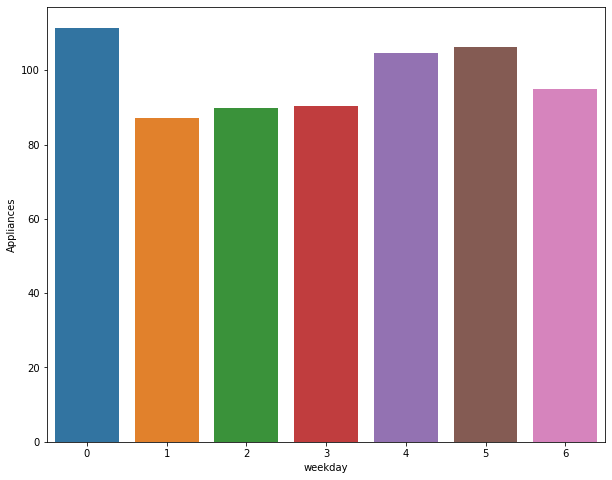

In [ ]:
plt.figure(figsize=(10,8))
weekday_eng=pd.DataFrame(df.groupby('weekday')['Appliances'].mean()).reset_index()
sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'])

Here we see that , that consumption is higher on weekends , ie week number 0, 6, 5

Lets do some more bivariate comparison analysis

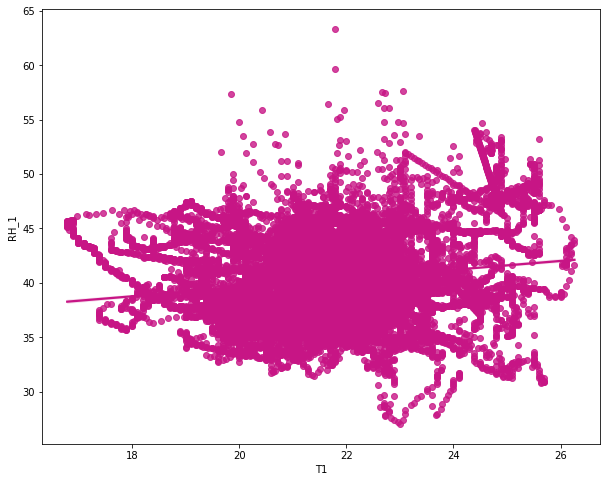

In [ ]:
 plt.figure(figsize=(10,8))
sns.regplot(x=df['T1'],y=df['RH_1'],color='mediumvioletred')

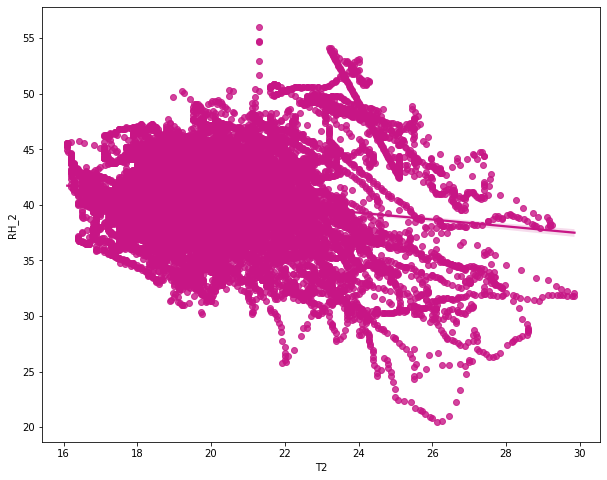

In [ ]:
 plt.figure(figsize=(10,8))
 sns.regplot(x=df['T2'], y=df['RH_2'],color='mediumvioletred')

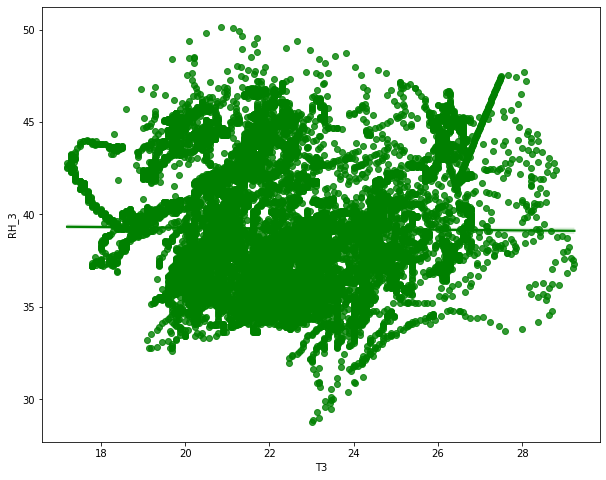

In [ ]:

 plt.figure(figsize=(10,8))
 sns.regplot(x=df['T3'],y=df['RH_3'],color='g')

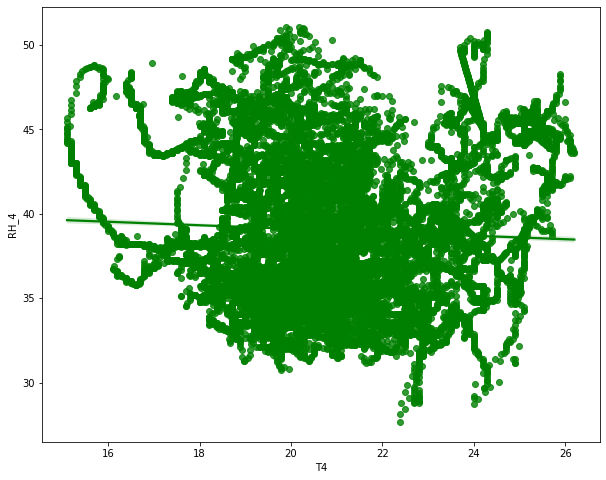

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T4'],y=df['RH_4'],color='g')

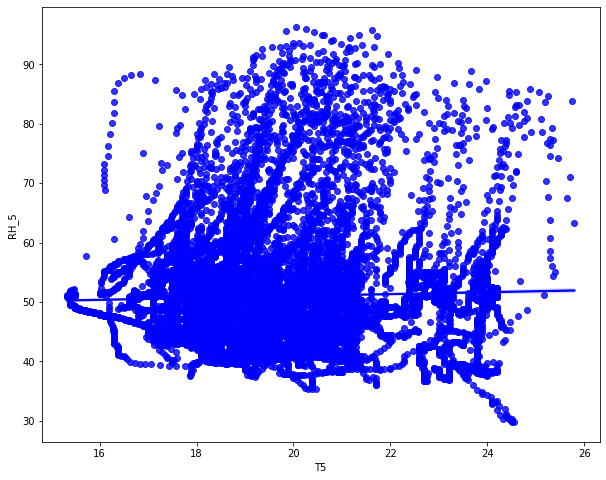

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T5'],y=df['RH_5'],color='b')

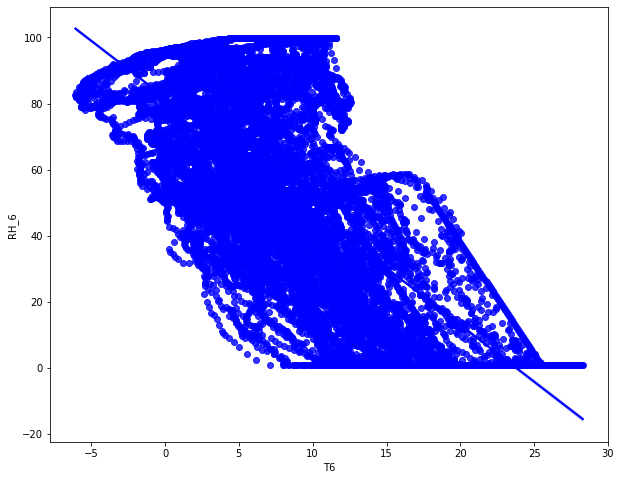

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T6'],y=df['RH_6'],color='b')

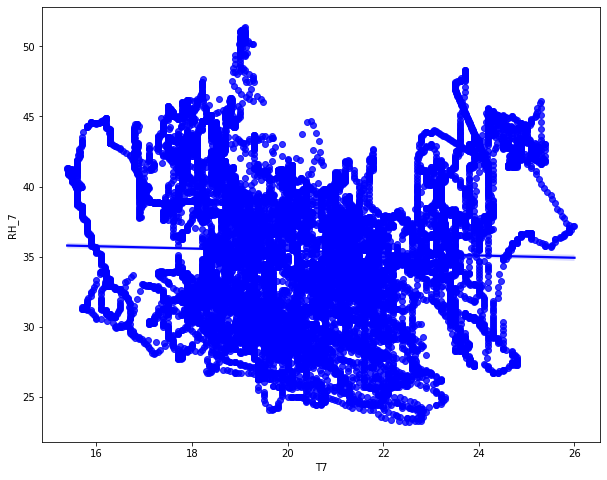

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T7'],y=df['RH_7'],color='b')

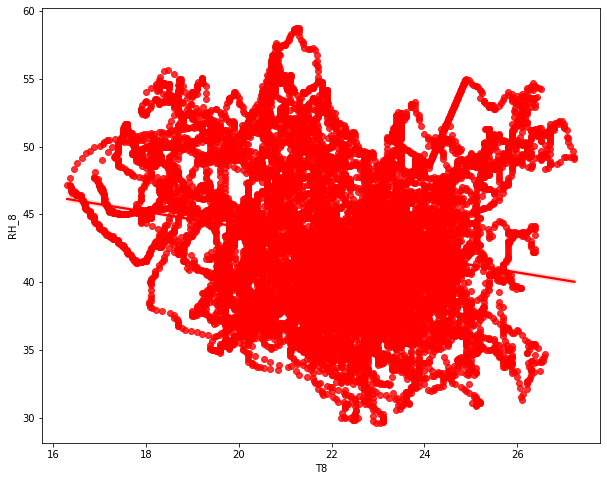

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T8'],y=df['RH_8'],color='r')

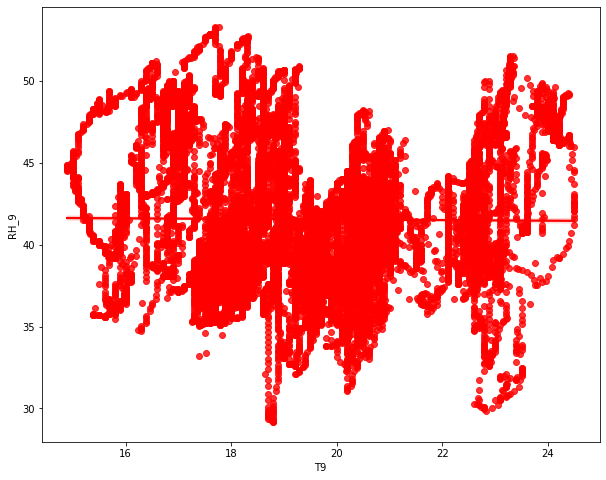

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T9'],y=df['RH_9'],color='r')

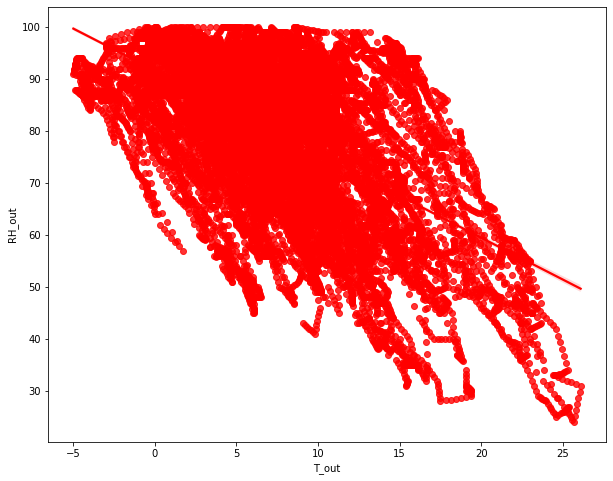

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x=df['T_out'],y=df['RH_out'],color='r')

**Let us plot the variation of energy consumption with these variables.For that lets create new columns------**

In [ ]:
temp_dict = {
    'T1' : 'temp_kitchen', 'T2' : 'temp_living', 'T3' : 'temp_laundry', 
    'T4' : 'temp_office', 'T5' : 'temp_bath', 'T6' : 'temp_outside',
    'T7' : 'temp_iron', 'T8' : 'temp_teen', 'T9' : 'temp_parents', 'T_out' : 'temp_station'
}

In [ ]:
df = df.rename(columns=temp_dict)

In [ ]:
humid_dict = {
    'RH_1' : 'humid_kitchen', 'RH_2' : 'humid_living', 'RH_3' : 'humid_laundry', 
    'RH_4' : 'humid_office', 'RH_5' : 'humid_bath', 'RH_6' : 'humid_outside',
    'RH_7' : 'humid_iron', 'RH_8' : 'humid_teen', 'RH_9' : 'humid_parents', 'RH_out' : 'humid_station'
}

In [ ]:
df=df.rename(columns=humid_dict)

In [ ]:
 cols = list(temp_dict.values())
cols.extend(list(humid_dict.values()))
cols.extend(['Appliances'])
 

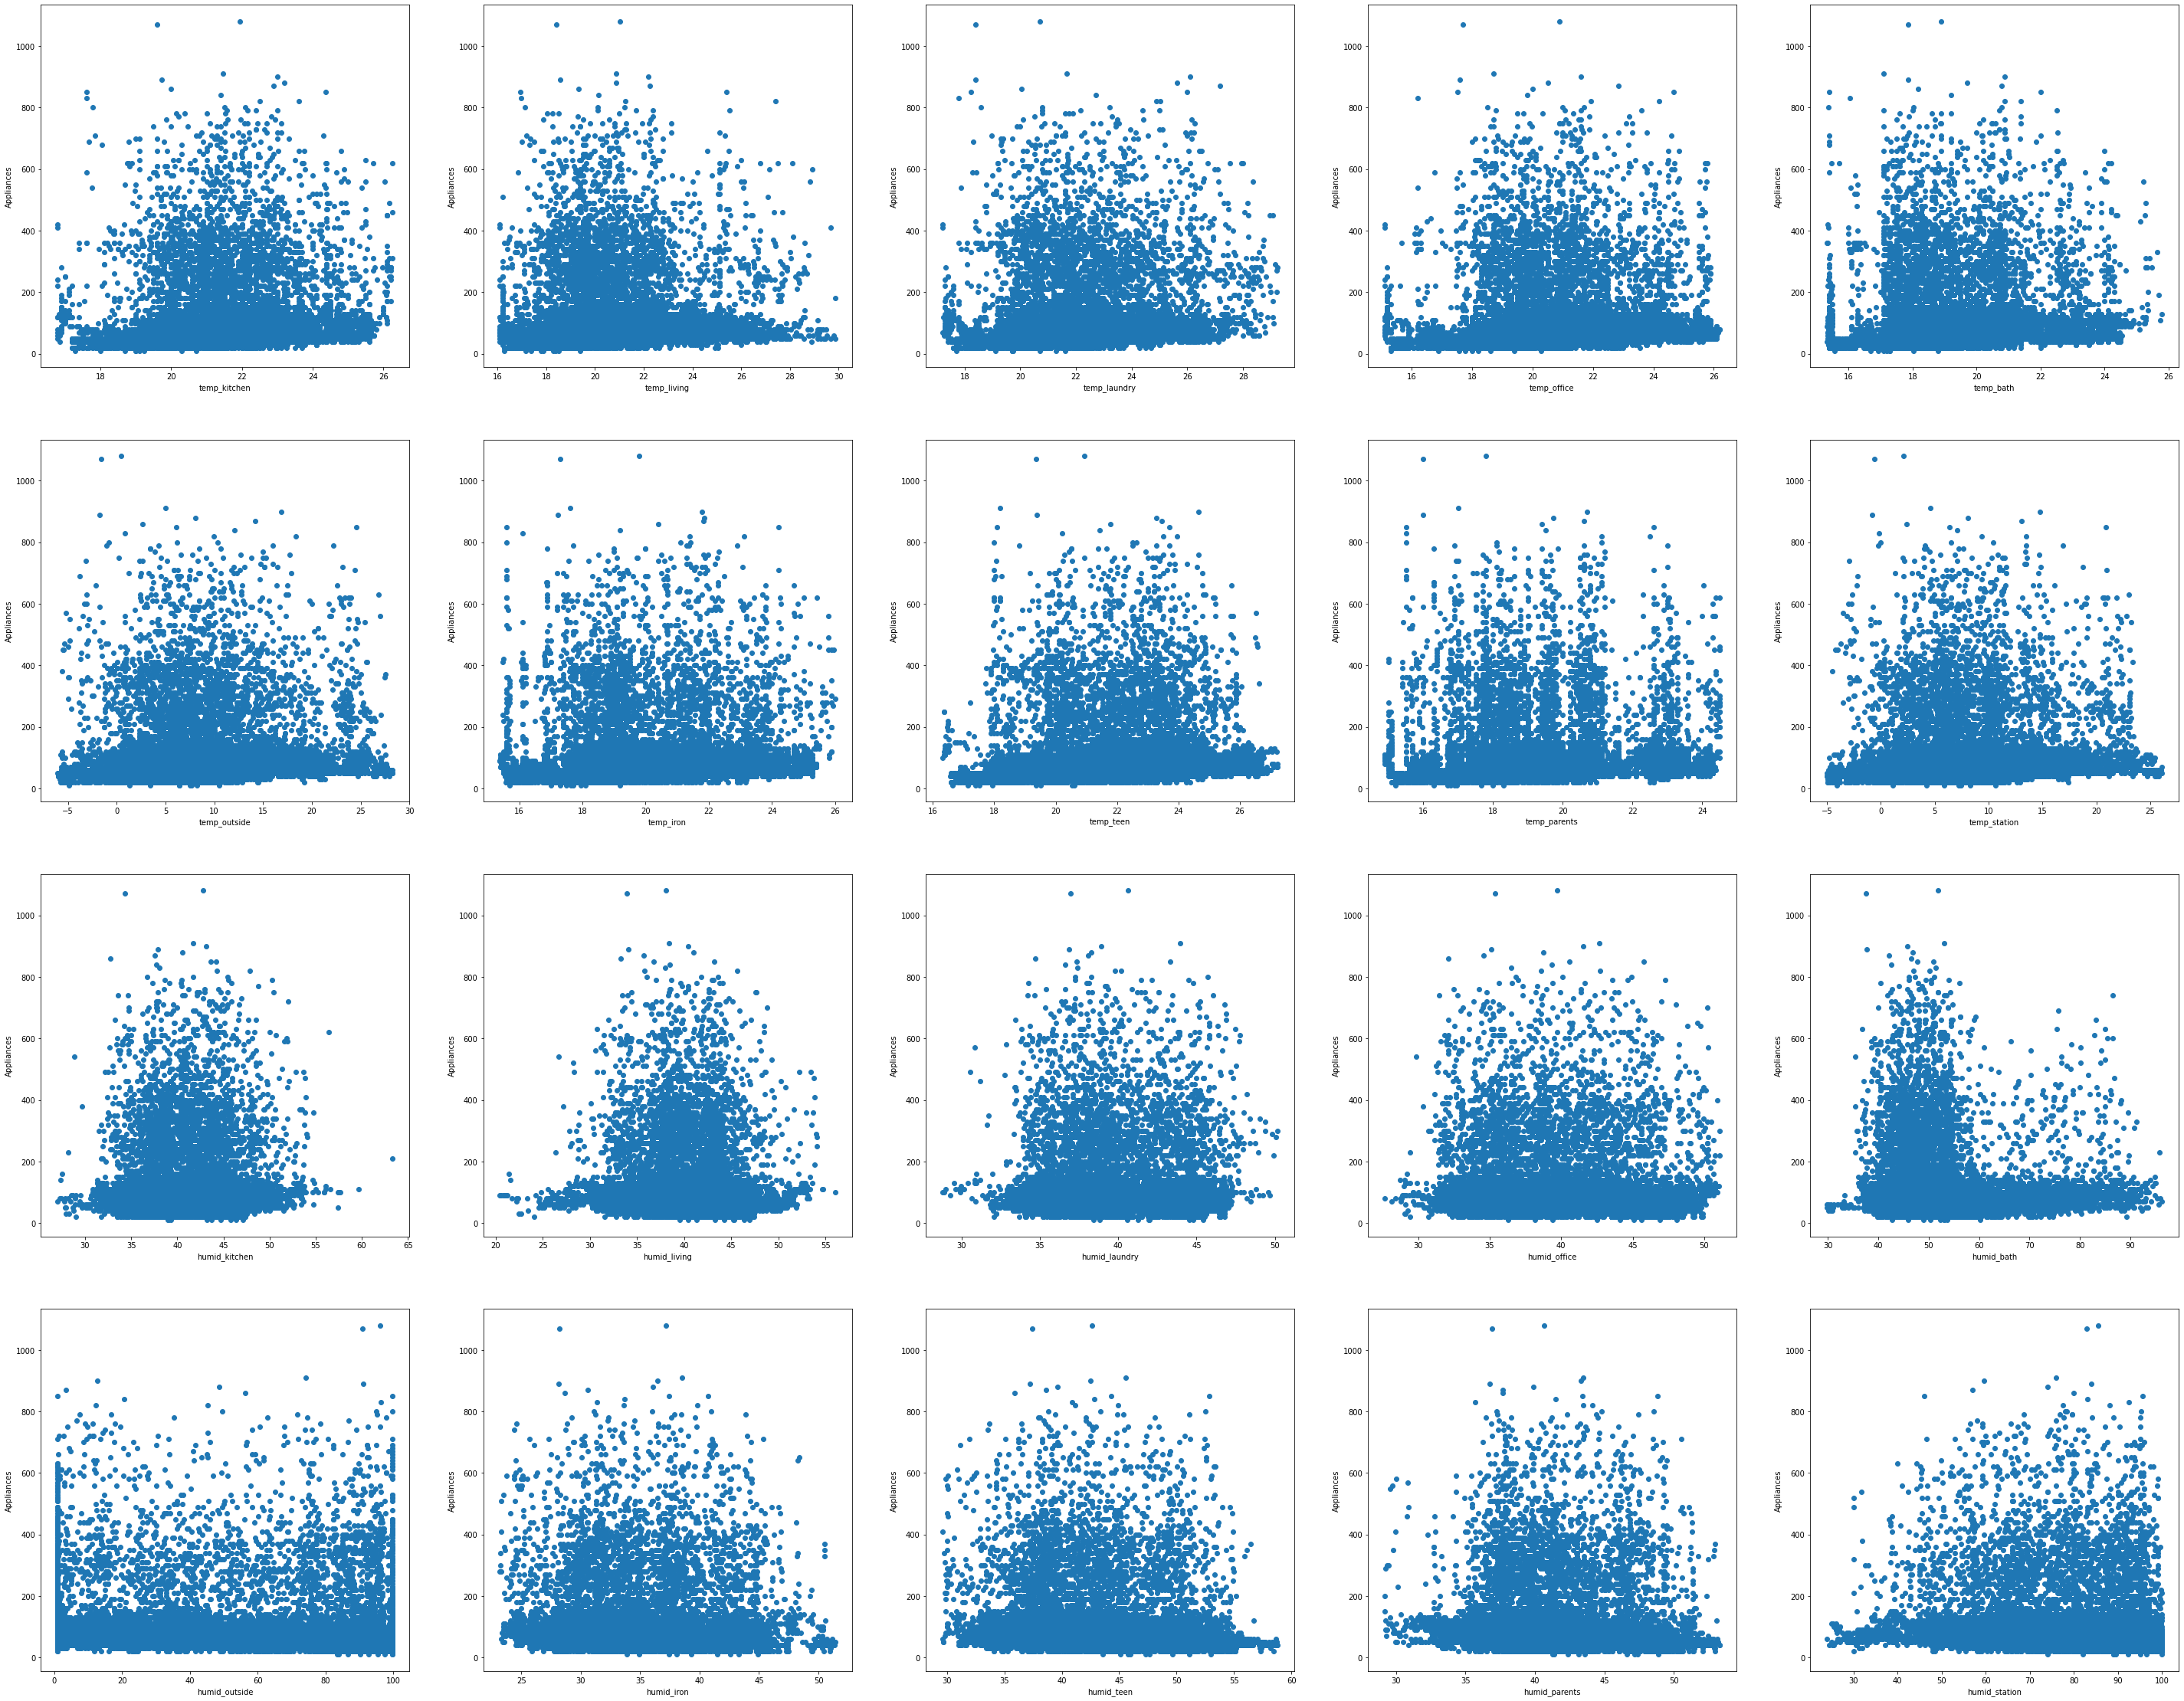

In [ ]:
fig, axes = plt.subplots(4,5,figsize = (50,40))
for i, col in enumerate(cols[:-1]):
  ax = axes[i//5, i%5]
  ax.scatter(df[col], df['Appliances'])
  ax.set_xlabel(col)
  ax.set_ylabel('Appliances')

**Lets look at the dependence of appliance energy consumption on newly created variables !**

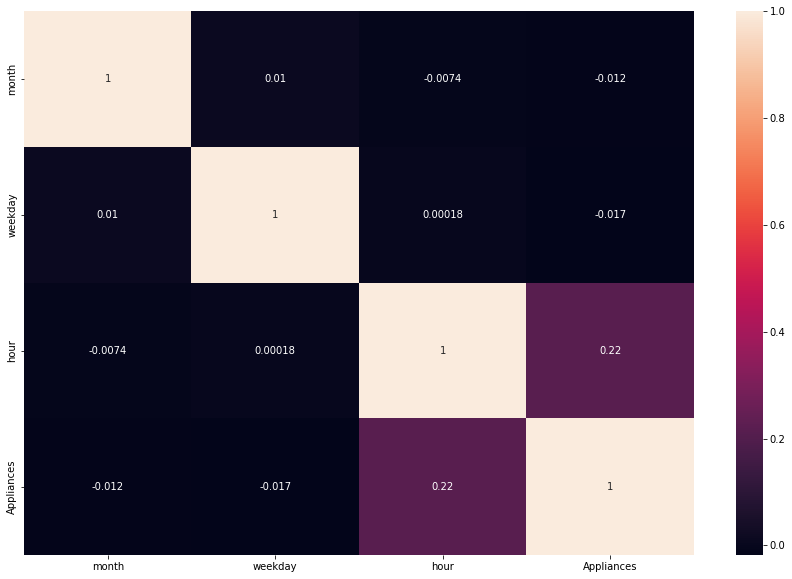

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[['month', 'weekday', 'hour', 'Appliances']].corr(), annot=True, ax=ax)

*  As we have observed earlier as well, there seenms to be no correlation between month and the observed energy use i.e. the enegy consumption pretty much remains similar over all months.
*  Similarly there is no direct effect of weekdays on appliance energy consumption.
* Although there is a correlation of 0.22 between hour and appliances.

# C.) Multivariate Analysis


Lets plot correlation Matrix.

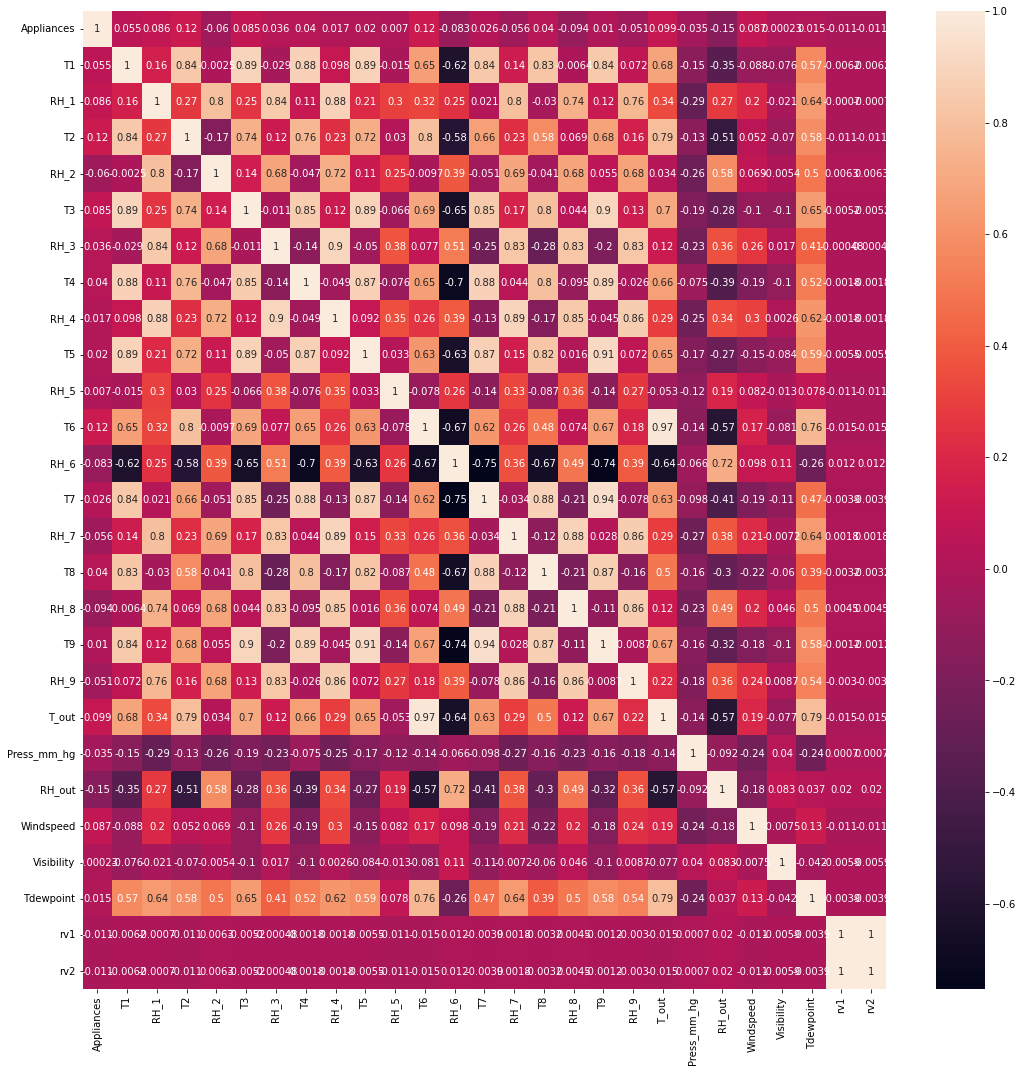

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,18))
sns.heatmap(df.corr(), ax=ax, annot=True)

In [ ]:
df[['T_out', 'RH_out']].corr()

T_out    RH_out
T_out   1.000000 -0.574197
RH_out -0.574197  1.000000

In [ ]:
App_corr=[]
for i in df.columns[1:]:
  
  App_corr.append([i,df[['Appliances',i]].corr().iloc[1][0]])

App_corr=pd.DataFrame(App_corr,columns=['feature','correlation']).sort_values(['correlation'],ascending=False)
App_corr

feature  correlation
0    Appliances     1.000000
3            T2     0.120073
11           T6     0.117638
19        T_out     0.099155
22    Windspeed     0.087122
2          RH_1     0.086031
5            T3     0.085060
1            T1     0.055447
7            T4     0.040281
15           T8     0.039572
6          RH_3     0.036292
13           T7     0.025801
9            T5     0.019760
8          RH_4     0.016965
24    Tdewpoint     0.015353
17           T9     0.010010
10         RH_5     0.006955
23   Visibility     0.000230
25          rv1    -0.011145
26          rv2    -0.011145
20  Press_mm_hg    -0.034885
18         RH_9    -0.051462
14         RH_7    -0.055642
4          RH_2    -0.060465
12         RH_6    -0.083178
16         RH_8    -0.094039
21       RH_out    -0.152282

**Observations based on correlation plot:--**
1. Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.
2. Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values
3. Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.
4. Random variables have no role to play
5. The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

**Since most of the temperature variables inside the room show little to know correlation with target variable, lets try to find components that could explain maximum variance, which might improve the correlation with target variable as well.
Before doing PCA, I need to split the data into train and test, and fit PCA on train set---------**

In [ ]:
#lets split data into training and test 
train_df, test_df = train_test_split(df, test_size=0.25, random_state=1)

**We are using 75% of the data for the training of the models and the rest is for testing**

In [ ]:
#lets check shape of training data
train_df.shape

(14801, 31)

In [ ]:
#lets see all features
train_df.describe()

Appliances  temp_kitchen  ...          hour         month
count  14801.000000  14801.000000  ...  14801.000000  14801.000000
mean      97.006959     21.688631  ...     11.553679      3.110060
std      101.831541      1.607124  ...      6.929752      1.339214
min       10.000000     16.790000  ...      0.000000      1.000000
25%       50.000000     20.730000  ...      6.000000      2.000000
50%       60.000000     21.600000  ...     12.000000      3.000000
75%      100.000000     22.600000  ...     18.000000      4.000000
max     1080.000000     26.260000  ...     23.000000      5.000000

[8 rows x 30 columns]

In [ ]:
#Lets see all the columns
df.columns

Index(['date', 'Appliances', 'temp_kitchen', 'humid_kitchen', 'temp_living',
       'humid_living', 'temp_laundry', 'humid_laundry', 'temp_office',
       'humid_office', 'temp_bath', 'humid_bath', 'temp_outside',
       'humid_outside', 'temp_iron', 'humid_iron', 'temp_teen', 'humid_teen',
       'temp_parents', 'humid_parents', 'temp_station', 'Press_mm_hg',
       'humid_station', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2',
       'weekday', 'hour', 'month'],
      dtype='object')

**Now its time for PCA-------------**

# PCA(Principal Component Analysis)

**What Is Principal Component Analysis?**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

# PCA on Temperature

In [ ]:
# Lets create temperature columns
temp_cols = list(set(list(temp_dict.values())) - {'temp_outside', 'temp_station'})
df['mean_temp'] = df[temp_cols].mean(axis=1)
df[['mean_temp', 'Appliances']].corr()

mean_temp  Appliances
mean_temp     1.00000     0.05474
Appliances    0.05474     1.00000

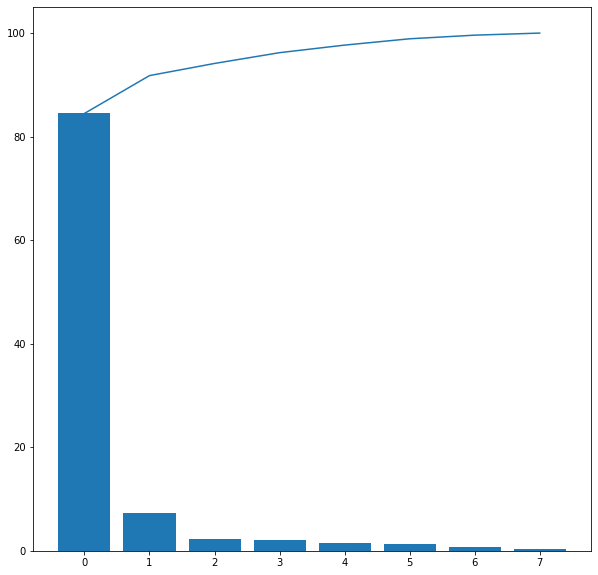

In [ ]:
#lets do pca
fig,ax = plt.subplots(1,1,figsize=(10,10))
pca = PCA()
pca.fit(train_df[temp_cols])
temp_pca = pca.transform(df[temp_cols])
variance = pca.explained_variance_ratio_*100
plt.bar(range(len(variance)), variance)
plt.plot(range(len(variance)), np.cumsum(variance))

In [ ]:
#lets see variance
variance

array([84.47933575,  7.30881032,  2.34558342,  2.08287611,  1.46151838,
        1.2205606 ,  0.70025736,  0.40105806])

**First two components seem to explain more than 91 % of variance in data.**

In [ ]:
for i in range(temp_pca.shape[1]):
  df[f'temp_pca{i+1}'] = temp_pca[:,i]

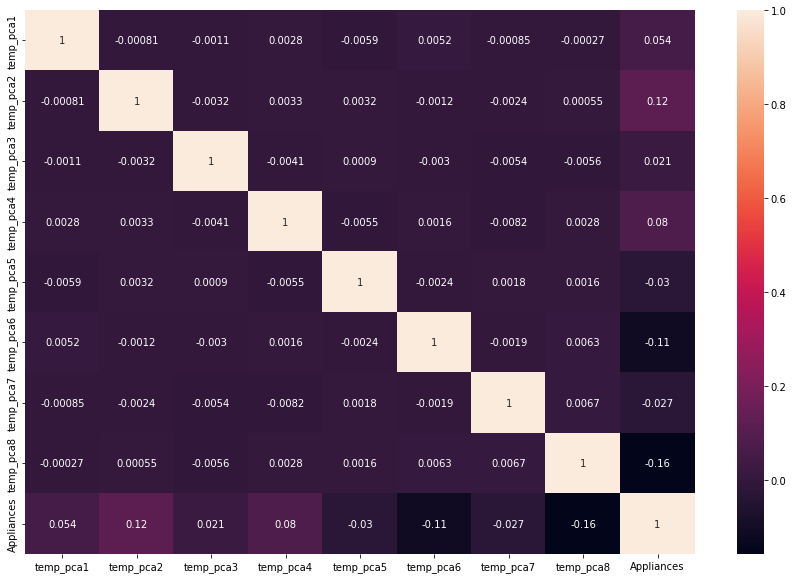

In [ ]:
 #lets plot heatmap for it
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[['temp_pca1', 'temp_pca2', 'temp_pca3', 'temp_pca4','temp_pca5', 'temp_pca6', 'temp_pca7', 'temp_pca8', 'Appliances']].corr(),ax = ax, annot=True)

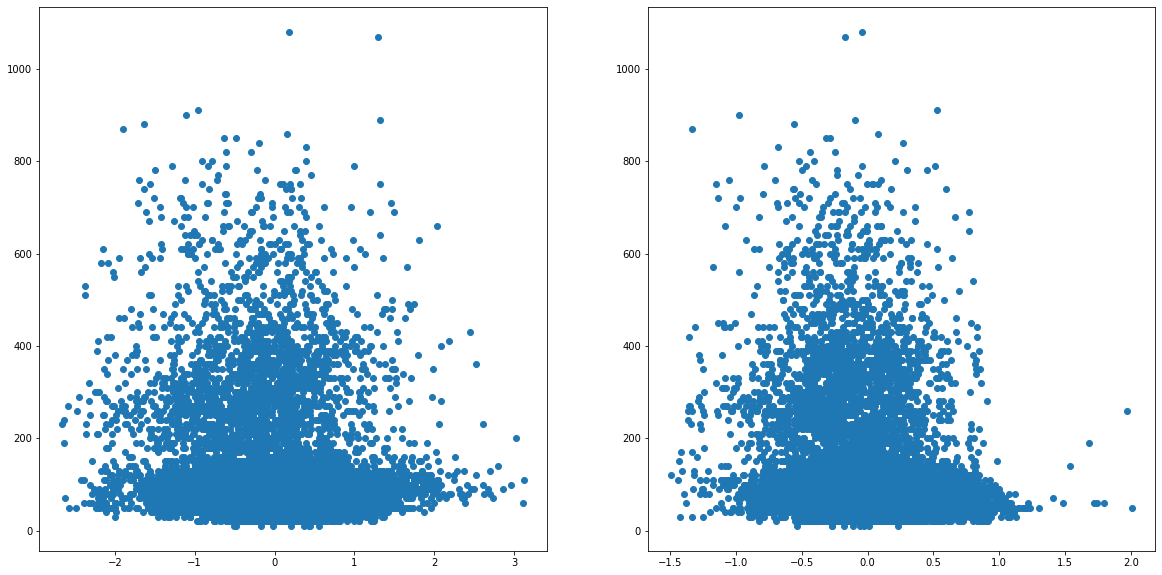

In [ ]:
#lets see their distribution
fig, axes = plt.subplots(1,2,figsize=(20,10))
for i, j in enumerate((6,8)):
  axes[i].scatter(df[f'temp_pca{j}'], df['Appliances'])

In [ ]:
#Lets look at components of humid_pca4
dict(zip(temp_cols, pca.components_[7,:]))

{'temp_bath': -0.2183001806975973,
 'temp_iron': -0.24127585177736335,
 'temp_kitchen': 0.6218351582976398,
 'temp_laundry': -0.29684551774163503,
 'temp_living': -0.1155347355026981,
 'temp_office': -0.09951701029789184,
 'temp_parents': 0.6057812329585469,
 'temp_teen': -0.170622262050026}

**Now its time for proceeding on PCA on humidity-----------**

# PCA on Humidity

In [ ]:
# lets create humidity column
humid_cols = list(set(list(humid_dict.values())) - {'humid_outside', 'humid_station'})
df['mean_humid'] = df[temp_cols].mean(axis=1)
df[['mean_humid', 'Appliances']].corr()

mean_humid  Appliances
mean_humid     1.00000     0.05474
Appliances     0.05474     1.00000

In [ ]:
# lets perform pca
fig,ax = plt.subplots(1,1,figsize=(10,10))
pca = PCA()
pca.fit(train_df[humid_cols])
humid_pca = pca.transform(df[humid_cols])
variance = pca.explained_variance_ratio_*100
plt.bar(range(len(variance)), variance,color='red')
plt.plot(range(len(variance)), np.cumsum(variance))


NameError: ignored

In [ ]:
# lets check variance
variance

array([61.9288204 , 28.22170427,  3.81136167,  2.19371393,  1.40659112,
        1.22151846,  0.64699641,  0.56929374])

In [ ]:
for i in range(humid_pca.shape[1]):
 df[f'humid_pca{i+1}'] = humid_pca[:,i]

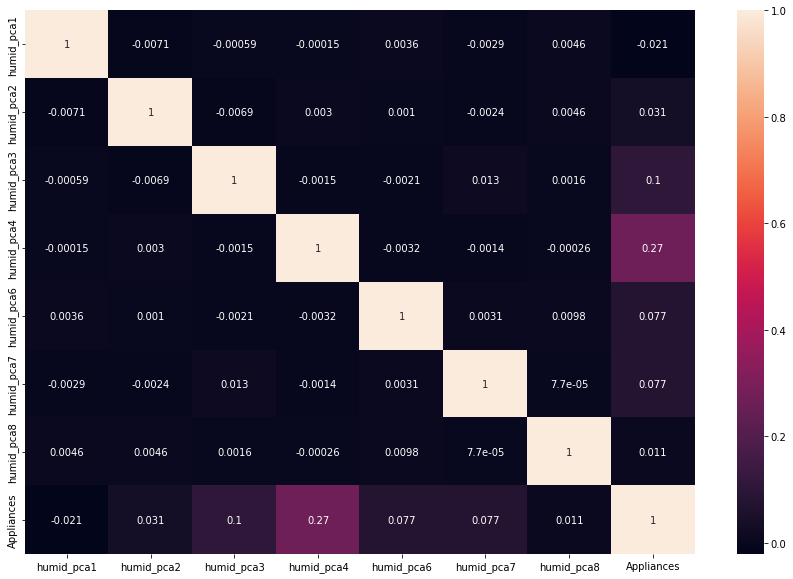

In [ ]:
# Lets plot heatmap relation
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[['humid_pca1', 'humid_pca2', 'humid_pca3', 'humid_pca4', 'humid_pca6', 'humid_pca7', 'humid_pca8', 'Appliances']].corr(),ax = ax, annot=True)

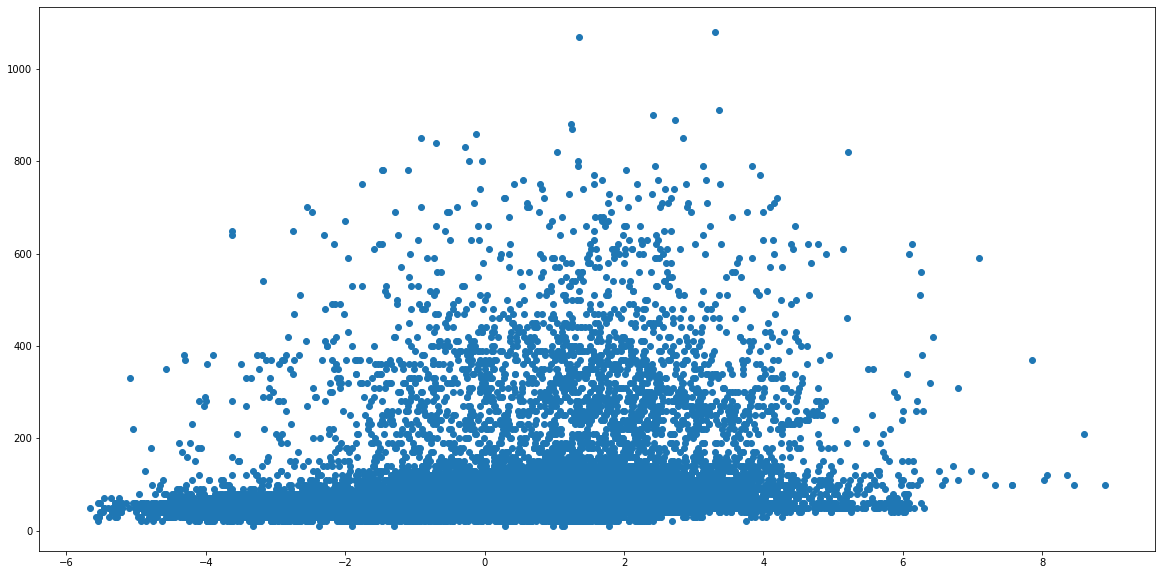

In [ ]:
# lets see its distribution
fig, axes = plt.subplots(1,1,figsize=(20,10))
plt.scatter(df['humid_pca4'], df['Appliances'])

In [ ]:
#Lets look at components of humid_pca4
dict(zip(humid_cols, pca.components_[3,:]))

{'humid_bath': -0.005575067965320146,
 'humid_iron': 0.08771523149655,
 'humid_kitchen': 0.41221431165348577,
 'humid_laundry': 0.28783072487832095,
 'humid_living': -0.5421879917244061,
 'humid_office': 0.4094850191124017,
 'humid_parents': -0.024947148374111855,
 'humid_teen': -0.5265354996627707}

In [ ]:
#Lets see their mean
df['diff_temp'] = df['temp_outside'] -df['mean_temp']
df[['diff_temp', 'Appliances']].corr()

diff_temp  Appliances
diff_temp     1.00000     0.12411
Appliances    0.12411     1.00000

**Its time for Modelling.Lets do that---------------**

# Modelling Technique

**This is a Regression problem. Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). The regression methods used are-------**

**1.Linear Models :-**
* 1.) Linear Regression----

In linear regression we wish to fit a function in this
Form Ŷ = β0+β1X1+β2X2+β3X3 where X is the vector of features and β0, β1 ,
β2, β3 are the coefficients we wish to learn. It updates β at every step by
reducing the loss function as much as possible. As modification to Linear regression model, we can apply Regularization techniques to penalize the coefficient values of the features, since higher values generally tend towards overfitting and loss of generalization.
* Ridge Regression

This loss function includes two elements. Sum of distances between each prediction and its ground truth. The second element sums over squared β values and multiplies it by another parameter λ. The reason for doing that is to “punish” the loss function for high values of the coefficients β.
It enforces the βcoefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model.
* Lasso Regression

The only difference from Ridge regression is that the regularization term is in absolute value. But this difference has a huge impact on the trade-off. Lasso method overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. Therefore, we might end up with fewer features included in the model than we started with, which is a huge advantage.
* 2.) Support Vector Machine----

* Support vector regression

The Support Vector Regression (SVR) uses the same principles as the SVM for classification . In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem.
* 3.) Nearest neighbour Regressor

* KNeighborsRegressor

KNeighborsRegressor retrieve some k neighbors of query objects, and make predictions based on these neighbors . It computes the mean of the nearest neighbor labels.
* 4.) Tree based Regression models

We divide the predictor space — that is, the set of possible values for X1, . . . , Xp — into J distinct and non-overlapping regions, R1, . . . , RJ . For every observation that falls into the region Rj , we make the same prediction, which is simply the mean of the response values for the training observations in Rj .
Our goal is to find boxes R1, . . . , RJ that minimize the RSS given by
RSS = X J j=1 X i∈Rj (yi − yˆRj ) 2 ,
where yˆRj is the mean response for the training observations within the jth box. Tree based models are less affected by outliers as compared to Linear models. Given there isn’t a linear relation between any input and the target variable, so it is likely that Trees will work better than Linear models.

* Ensemble methods 

It combines several decision trees to produce better predictive performance than utilising a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.
- Bagging : Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. Average of all the predictions from different trees are used which is more robust than a single decision tree.& Boosting

* Boosting

 Boosting is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

* Random Forests

A Random Forest is an ensemble technique capable of performing both regression tasks with the use of multiple decision trees and a technique called bagging. and works well on high dimensional data
* Gradient Boosting Machines

Gradient Boosting is an extension over boosting method. It uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss . Gradient Boosting= Gradient Descent + Boosting.

 * Extremely Randomized trees

The Extra-Trees algorithm builds an ensemble of unpruned decision or regression trees according to the classical top-down procedure. It splits nodes by choosing cut-points fully at random and that it uses the whole learning sample to grow the trees.

* 5.) Neural Networks

A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron. They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP. MLPs with one hidden layer are capable of approximating any continuous function.

# Modeling with PCA features

In [ ]:
 final_features = ['temp_pca1', 'temp_pca2', 'humid_pca1', 'humid_pca2', 'temp_outside', 'humid_outside',  'Windspeed', 'Press_mm_hg', 'Appliances']
 

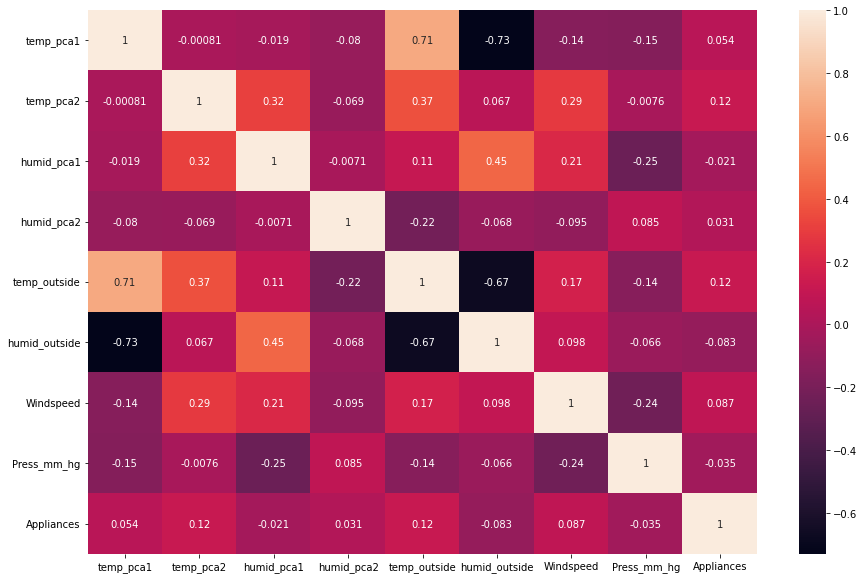

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(df[final_features].corr(), ax = ax, annot=True)

In [ ]:
final_train_df, final_test_df = train_test_split(df[final_features], test_size = 0.25, random_state = 1)

In [ ]:
X_train, y_train = final_train_df.drop('Appliances', axis=1), final_train_df['Appliances']
X_test, y_test = final_test_df.drop('Appliances', axis=1), final_test_df['Appliances']

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[07:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df = df = pd.DataFrame(model_data)

In [ ]:
results_df

Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.009252  ...      -0.000693         1.027085
1                      Ridge:     0.005533  ...       0.032063         1.010136
2        KNeighborsRegressor:     0.043651  ...       0.472589         0.745642
3                         SVR:   10.498593  ...       0.077092         0.986360
4                RandomForest    12.141721  ...       0.548151         0.690165
5         ExtraTreeRegressor :    3.351980  ...       0.626732         0.627287
6  GradientBoostingRegressor:     3.680906  ...       0.167333         0.936897
7               XGBRegressor:     0.953478  ...       0.163041         0.939308
8               MLPRegressor:     3.918698  ...       0.168297         0.936354

[9 rows x 5 columns]

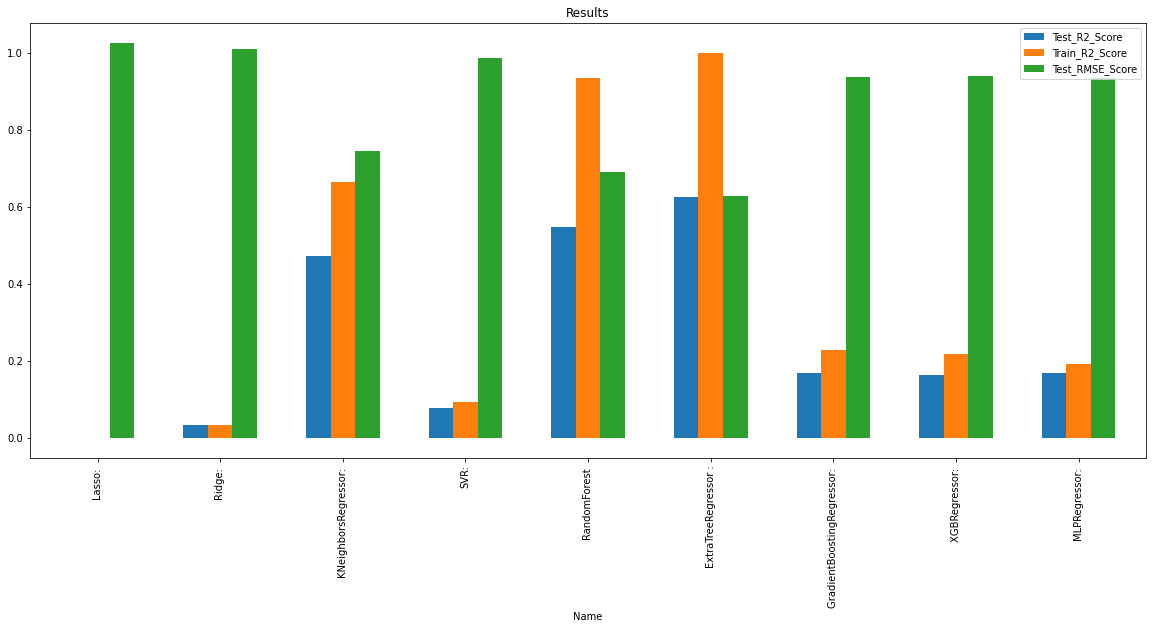

In [ ]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

 **Observation:-**


* Extra Tree Regressor performs the best so far with a R2 score of 0.59 and RMSE of 0.65.
* Lasso regression is the worst performing model so far.

# Hyper-parameter Tunning 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'log2', 'n_estimators': 250}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='log2', n_estimators=250,
                    random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.6265464345123004

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.627443181096569

**We observe a minute improvement in R2 score and RMSE score after hyper parameter tuning of Extra Trees Regressor.**

In [ ]:
 errors = []
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ < 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ < 300,:])*sc_y.scale_ + sc_y.mean_)))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


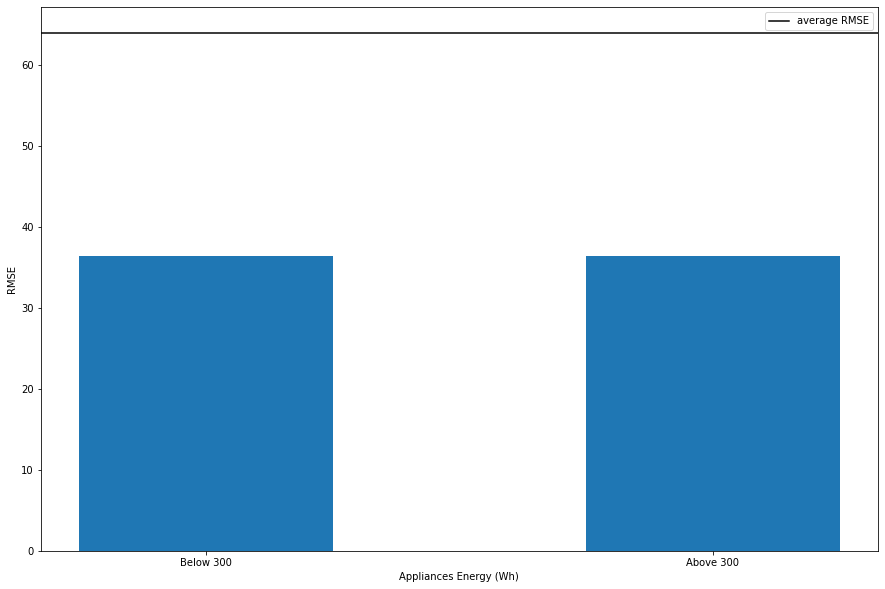

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(15,10))
plt.bar(x=['Below 300', 'Above 300'], height=errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='black', label='average RMSE')
plt.xlabel('Appliances Energy (Wh)')
plt.ylabel('RMSE')
plt.legend(loc='best')

In [ ]:
X_test = pd.DataFrame(X_test, columns=final_features[:-1])
y_test = pd.Series(y_test, name = 'log_Appliances')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 0, 'Samples')

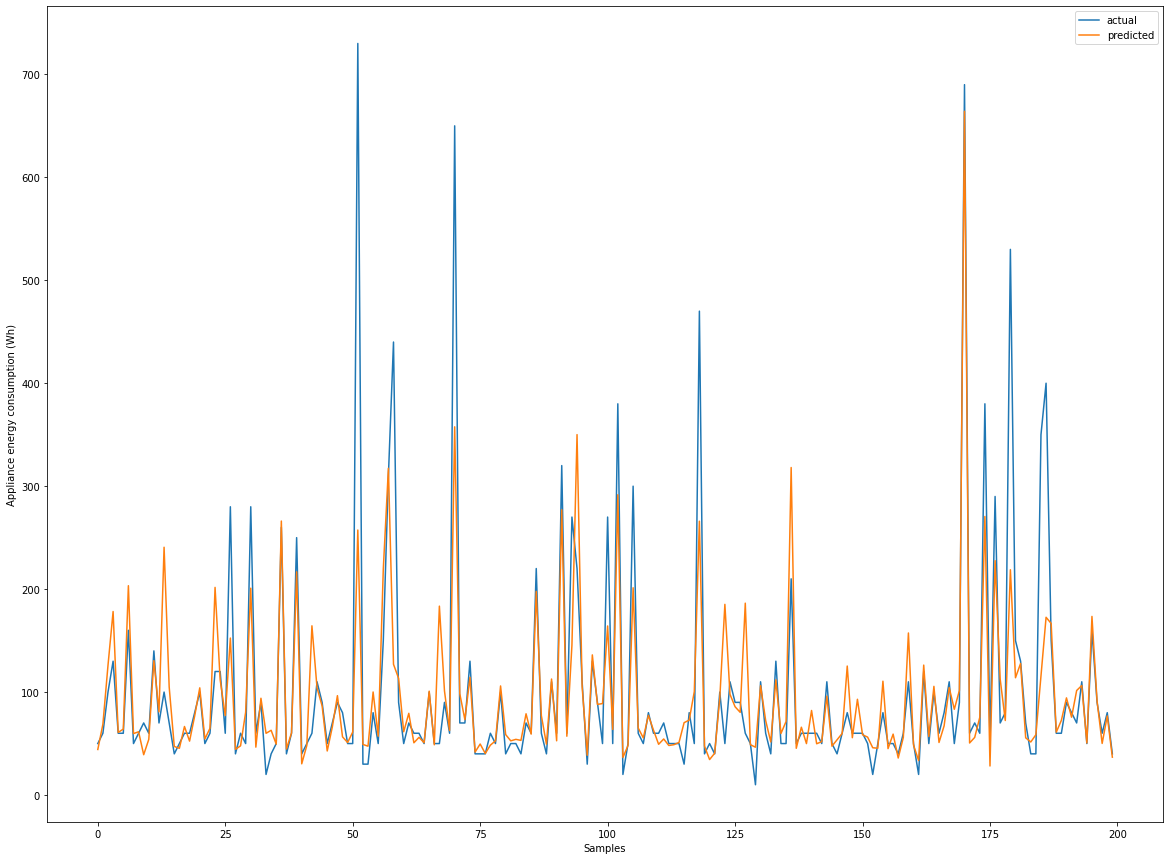

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(20,15))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual')
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test.iloc[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted')
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')

# Feature Importance

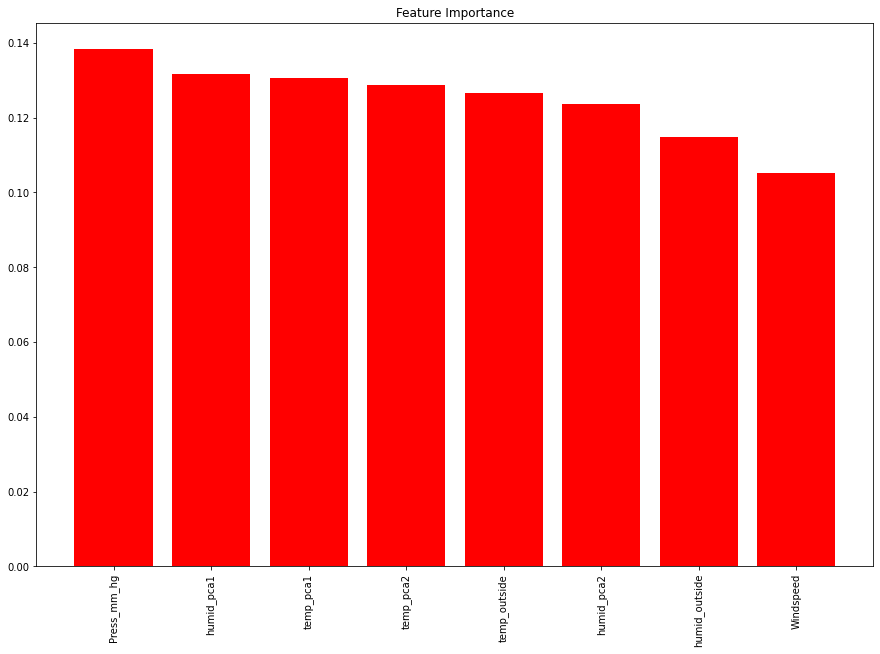

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(15,10))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color='red')
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


**Looking at the feature importances, it is clear that the PCA features of temperature and humidity hold slightly higher feature importances compared to others.**

# Modeling Without PCA features

 **Including all temperature and humidity features  in our features set.**

In [ ]:
 final_features = ['temp_laundry','temp_bath', 'temp_kitchen', 'temp_parents', 'temp_office', 'temp_living', 'temp_teen', 'temp_iron','humid_kitchen',
 'humid_office', 'humid_bath', 'humid_living', 'humid_parents', 'humid_laundry', 'humid_teen', 'humid_iron',
  'temp_outside', 'humid_outside', 'temp_station', 'humid_station', 'Windspeed', 'Press_mm_hg', 'Appliances']

In [ ]:
 final_train_df, final_test_df = train_test_split(df[final_features], test_size = 0.25, random_state = 1)

In [ ]:
X_train, y_train = final_train_df.drop('Appliances', axis=1), final_train_df['Appliances']
X_test, y_test = final_test_df.drop('Appliances', axis=1), final_test_df['Appliances']

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape([-1,1])).flatten()
y_test = sc_y.transform(y_test.values.reshape([-1,1])).flatten()

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()],
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[08:06:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df = pd.DataFrame(model_data)

In [ ]:
results_df


Name  Train_Time  ...  Test_R2_Score  Test_RMSE_Score
0                      Lasso:     0.015130  ...      -0.000693         1.027085
1                      Ridge:     0.003596  ...       0.152034         0.945465
2        KNeighborsRegressor:     0.000626  ...       0.480400         0.740101
3                         SVR:   11.224575  ...       0.217455         0.908261
4                RandomForest    32.099722  ...       0.565234         0.676992
5         ExtraTreeRegressor :    7.887102  ...       0.628927         0.625440
6  GradientBoostingRegressor:     7.342305  ...       0.243311         0.893130
7               XGBRegressor:     1.519811  ...       0.248850         0.889855
8               MLPRegressor:     5.381916  ...       0.291155         0.864434

[9 rows x 5 columns]

**The model results are almost similar to that observed in models trained with PCA feature set.**

# Hyper-parameter Tuning

In [ ]:
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [ ]:
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                    random_state=40)

In [ ]:
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [ ]:
grid_search.best_estimator_.score(X_test,y_test)

0.6357916210989515

In [ ]:
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

0.6196280436624659

In [ ]:
errors = []
errors.append(np.sqrt(mean_squared_error(y_test[y_test*sc_y.scale_ + sc_y.mean_ < 300]*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test[y_test*sc_y.scale_ + sc_y.mean_ < 300,:])*sc_y.scale_ + sc_y.mean_)))


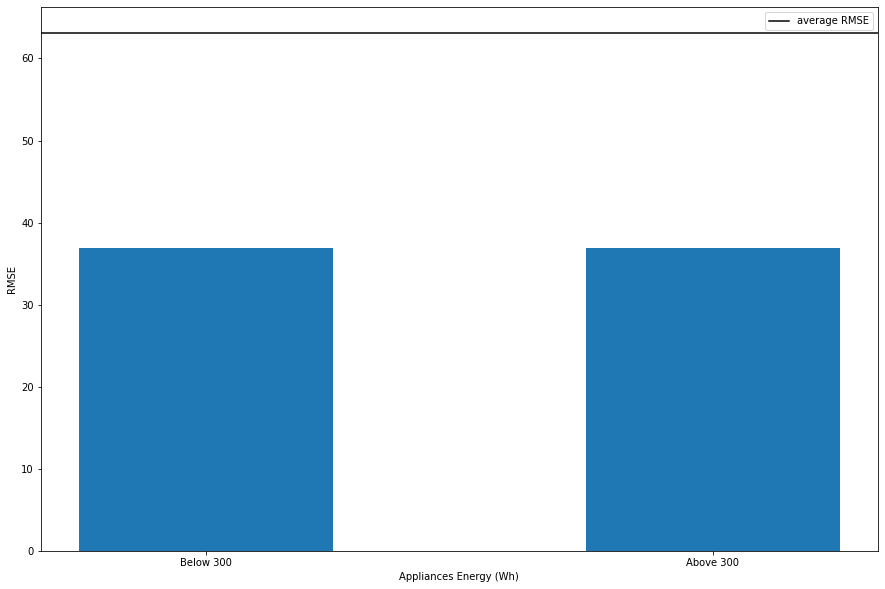

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(15,10))
plt.bar(x=['Below 300', 'Above 300'], height=errors, width = 0.5)
plt.axhline(np.sqrt(mean_squared_error(y_test*sc_y.scale_ + sc_y.mean_, grid_search.best_estimator_.predict(X_test)*sc_y.scale_ + sc_y.mean_)), color='black', label='average RMSE')
plt.xlabel('Appliances Energy (Wh)')
plt.ylabel('RMSE')
plt.legend(loc='best')

The model seems to make more errors in predicting the ones where actual energy consumption levels of appliances is quite high (above 300 Wh). While below 300 Wh, the RMSE is below the average RMS of entire test set.

In [ ]:
X_test = pd.DataFrame(X_test, columns=final_features[:-1])
y_test = pd.Series(y_test, name = 'Appliances')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0.5, 0, 'Samples')

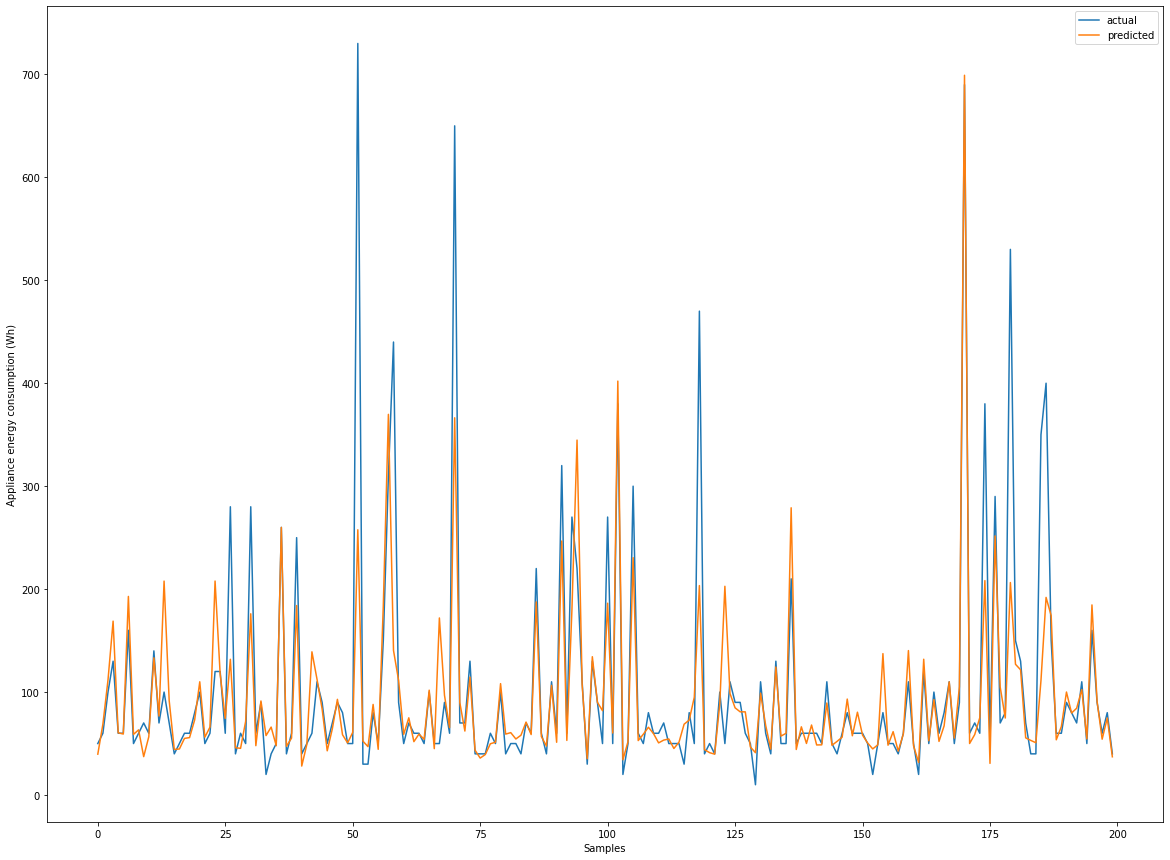

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(20,15))
plt.plot(range(len(y_test[:200])), y_test[:200]*sc_y.scale_ + sc_y.mean_, label='actual')
plt.plot(range(len(y_test[:200])), grid_search.best_estimator_.predict(X_test.iloc[:200,:])*sc_y.scale_ + sc_y.mean_, label='predicted')
plt.legend(loc='best')
plt.ylabel('Appliance energy consumption (Wh)')
plt.xlabel('Samples')

# Feature Importance

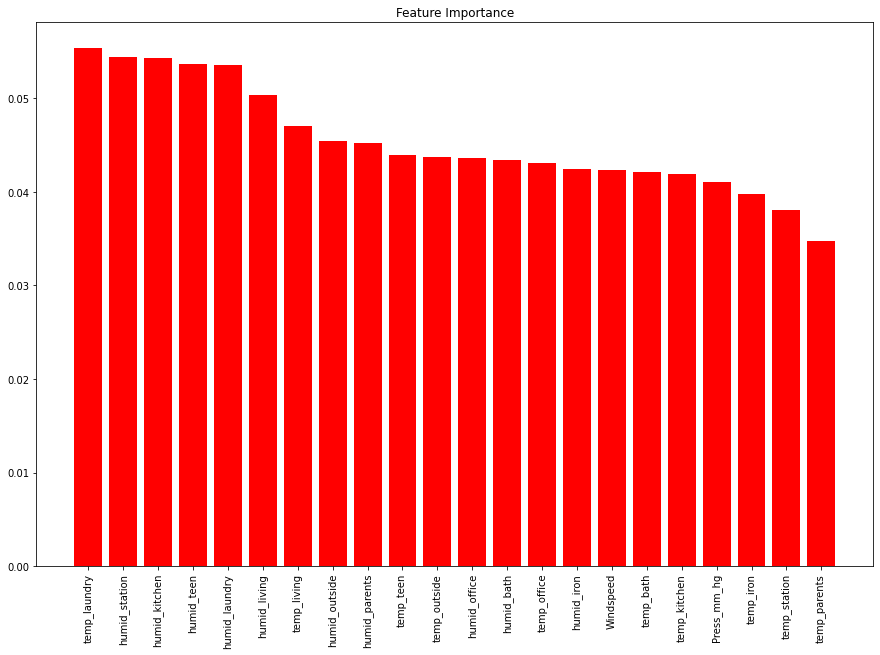

In [ ]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
importances = models[5][1].feature_importances_
indices = np.argsort(importances)[::-1]
names = [final_train_df.columns[i] for i in indices]

plt.figure(figsize=(15,10))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color='red')
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

# Observations

Based on parameter tunning step we can see that

a. 5 most important features are - ['teen_humid','laundry_temp','station_humid','kitchen_humid','laundry_humid']

b. 5 least important features are - ['bath_temp','ironing_temp','kitchen_temp','parents_temp','Visibility']

As can be observed with R2 Score , compared to Tuned model 0.63 the R2 score has come down to 0.49 which is decrease of 25%. The reduction in R2 score is high and we should not use reduced feature set for this data set.

# Conclusion

* The temperature/ humidity features showed little to no correlation w.r.t to target variable (<1%), although being highly correlation among each other.

* The time zone of the day plays an important role in deciding power consumption of appliances.

* The best Algorithm to use for this dataset is Extra Trees Regressor

* PCA helped us to reduce our feature set dimension considerably without affcting performance of our models significantly.

* The untuned model was able to explain 63% of variance on test set, while the tuned model was able to explain 64% of variance on test set which is improvement of 1.5 %

* The least RMSE score on test data set is found to be around 0.6**

# Scope of Improvement

* We can work on time series by adding some more features the day/week, month to explore more on the model performance.

* We can try various hyper-parameter tuning methods, neural networks can also be worked upon.

# Reflections

This project can be summarized as
1. Looking for Energy related dataset on UCI Machine Learning repository and Kaggle where in benchmark numbers are availiable
2. Deciding as Regression problems.
3. Visualized the data, did preprocessing by learning from other regression contests from Kaggle.
4. Preprocessing the data and feature selection.Look for correlation between features
5. Deciding the regression algorithms to be used to solve the problem.
6. Using GridSearchCV instead of RandomizedSearchCV to create benchmark model.
7. Applying selected algorithms and visualizing the results.
8. Hyper parameter tuning for the best algorithm and reporting the test score of best model.
9. Discuss importance of selected features and check the robustness of model..
10.Comparing my tuned model 

# Challenges & Learning gained during project

1. Feature scaling is very important for regressions models , I initially tried without it and the results were not good . On Kaggle this is suggested by all users.
2. Using seed value helped in reproducing results for algortithms . Without this value the results were different each time.
3. It is very important to check the intercorrelation between all the variables in order to remove the redundant features with high correlation values.
4. While scaling data , it is useful to maintain separate copies of dataframe which can be created using index and column names of original dataframe
5. The pipeline of adding algorithms should be easy to manage
6. Seaborn and pyplot are good libraries to plot various properties of dataframe
7. For performing Exhaustive search or Random search in the hyperparameter space for tuning the model, always parallelize the process since there are a lot of models with different configurations to be fitted. (Set n_jobs parameter with the value -1 to utilize all CPUs)
8. One effective way to check the robustness of the model is to fit it on a reduced feature space in case of high dimensional data. Select the first ‘k’ (usually >= 3) key features for this task.

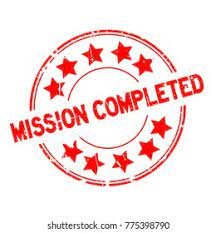

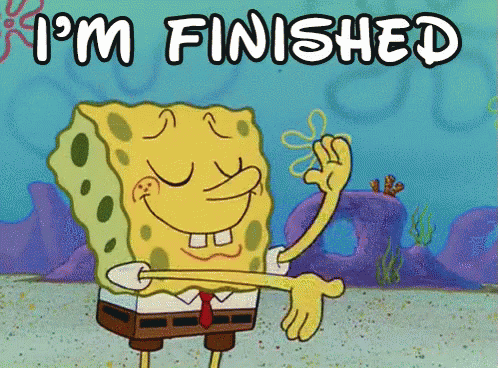